# Comparing improvements to phage metagenomics tools

In [59]:
!pip install pandas==1.0.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.1 MB 20.1 MB/s eta 0:00:01    |█████▎                          | 1.7 MB 20.1 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

colorblind_palette = ["#88CCEE","#DDCC77","#CC6677","#117733"]

## 1. Creating and manipulating the dataframe

In [62]:
filepath = "/projects/laal5512/benchmarking_output/10-17-2022_1129.csv" 
#filepath = '/Users/latifa/GitHub/benchmarking-enrichseq/10-11-2022_1411.csv'
results_df: pd.DataFrame = pd.read_csv(filepath)
    
results_df

,tool,trial_num,experiment,condition,num_genomes,num_reads,true_pos,false_pos,false_neg,precision,recall,f1_score,l2_abundance
0,FASTVIROMEEXPLORER,3,num_reads_800genomes,800_genomes_1000000_reads,800,1000000,766,21,7,0.973316,0.990944,0.982051,0.048833
1,BRACKEN,3,num_reads_800genomes,800_genomes_1000000_reads,800,1000000,230,535,543,0.300654,0.297542,0.299090,0.158189
2,ENRICHSEQ,3,num_reads_800genomes,800_genomes_1000000_reads,800,1000000,623,72,150,0.896403,0.805951,0.848774,0.331701
3,BRACKEN,3,num_reads_800genomes,800_genomes_200000_reads,800,200000,227,542,546,0.295189,0.293661,0.294423,0.164333
4,ENRICHSEQ,3,num_reads_800genomes,800_genomes_200000_reads,800,200000,101,8,672,0.926606,0.130660,0.229025,0.093577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,BRACKEN,1,num_genomes,200_genomes_500000_reads,200,500000,62,258,138,0.193750,0.310000,0.238462,0.161181
214,ENRICHSEQ,1,num_genomes,200_genomes_500000_reads,200,500000,185,35,15,0.840909,0.925000,0.880952,0.152588
215,FASTVIROMEEXPLORER,1,num_genomes,800_genomes_500000_reads,800,500000,0,0,0,0.000000,0.000000,0.000000,0.000000
216,BRACKEN,1,num_genomes,800_genomes_500000_reads,800,500000,231,496,543,0.317744,0.298450,0.307795,0.175085


## 2. Classification Performance

### 2.1 *Number of Genomes* experiment

#### F1 Score

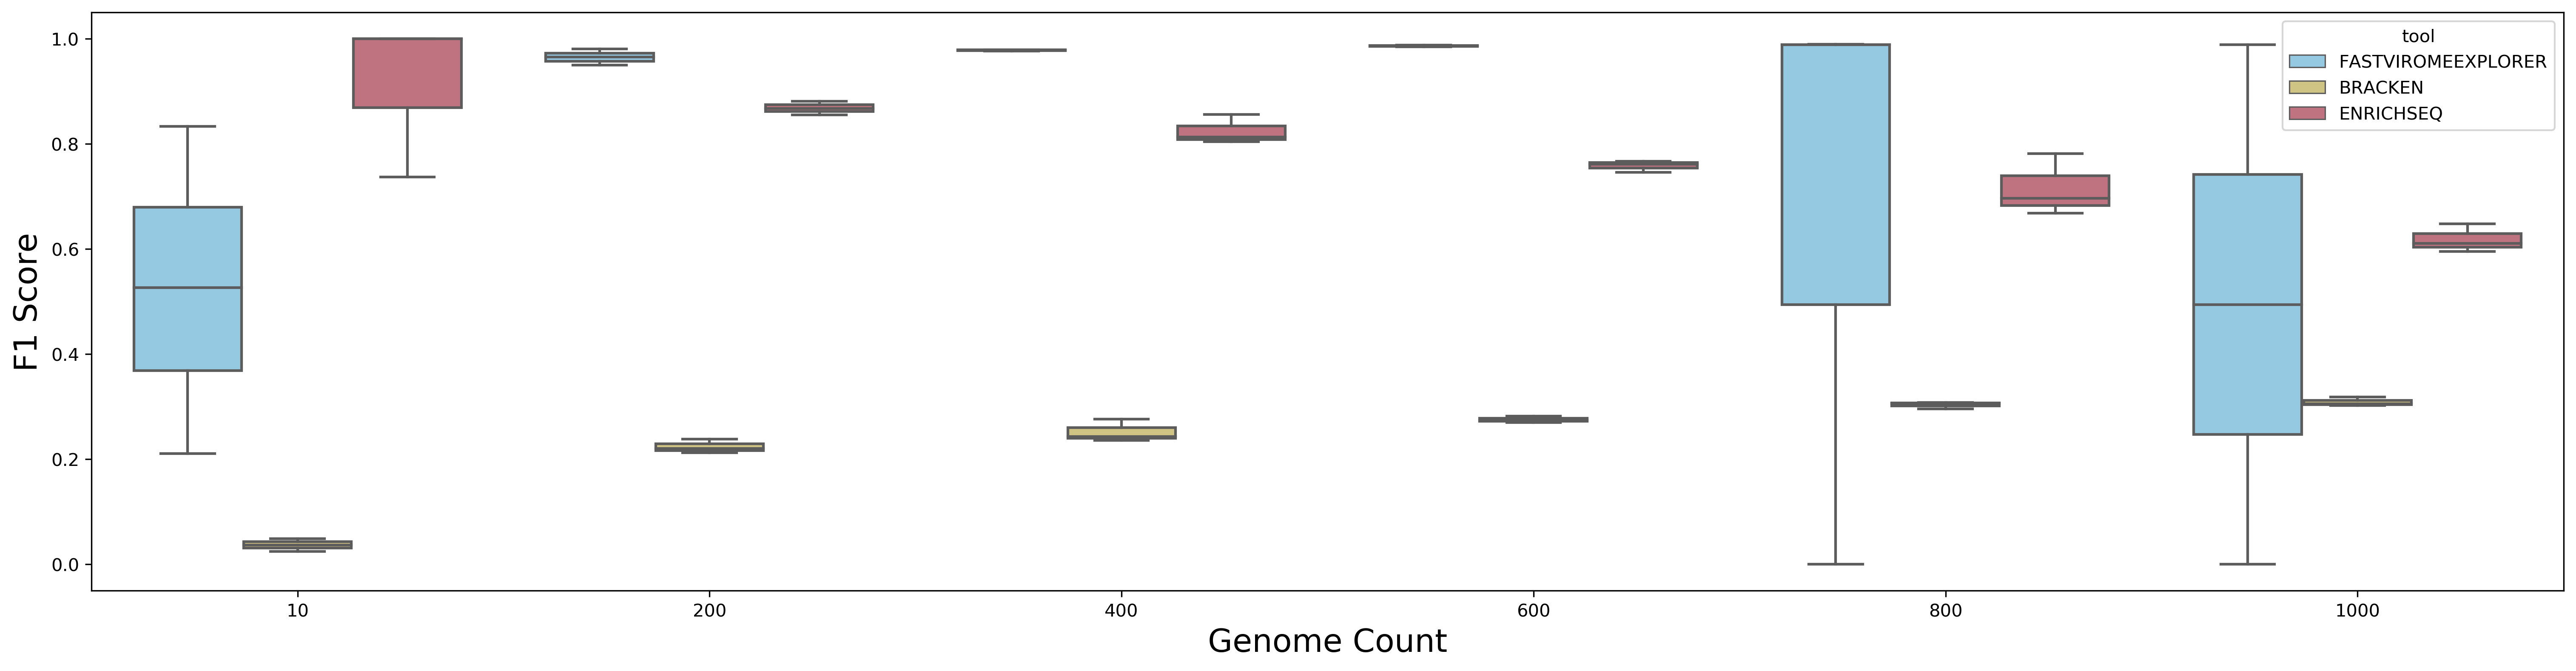

In [16]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_genomes_df = results_df[results_df['experiment'] == 'num_genomes']


# choose EnrichSeq version and plot
#sns.violinplot(data=num_genomes_df, x="num_genomes", y="f1_score", hue="tool", scale='width', width=0.8, scale_hue=False, palette=colorblind_palette)
sns.boxplot(data=num_genomes_df, x="num_genomes", y="f1_score", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.show()

#### Precision (num_genomes)

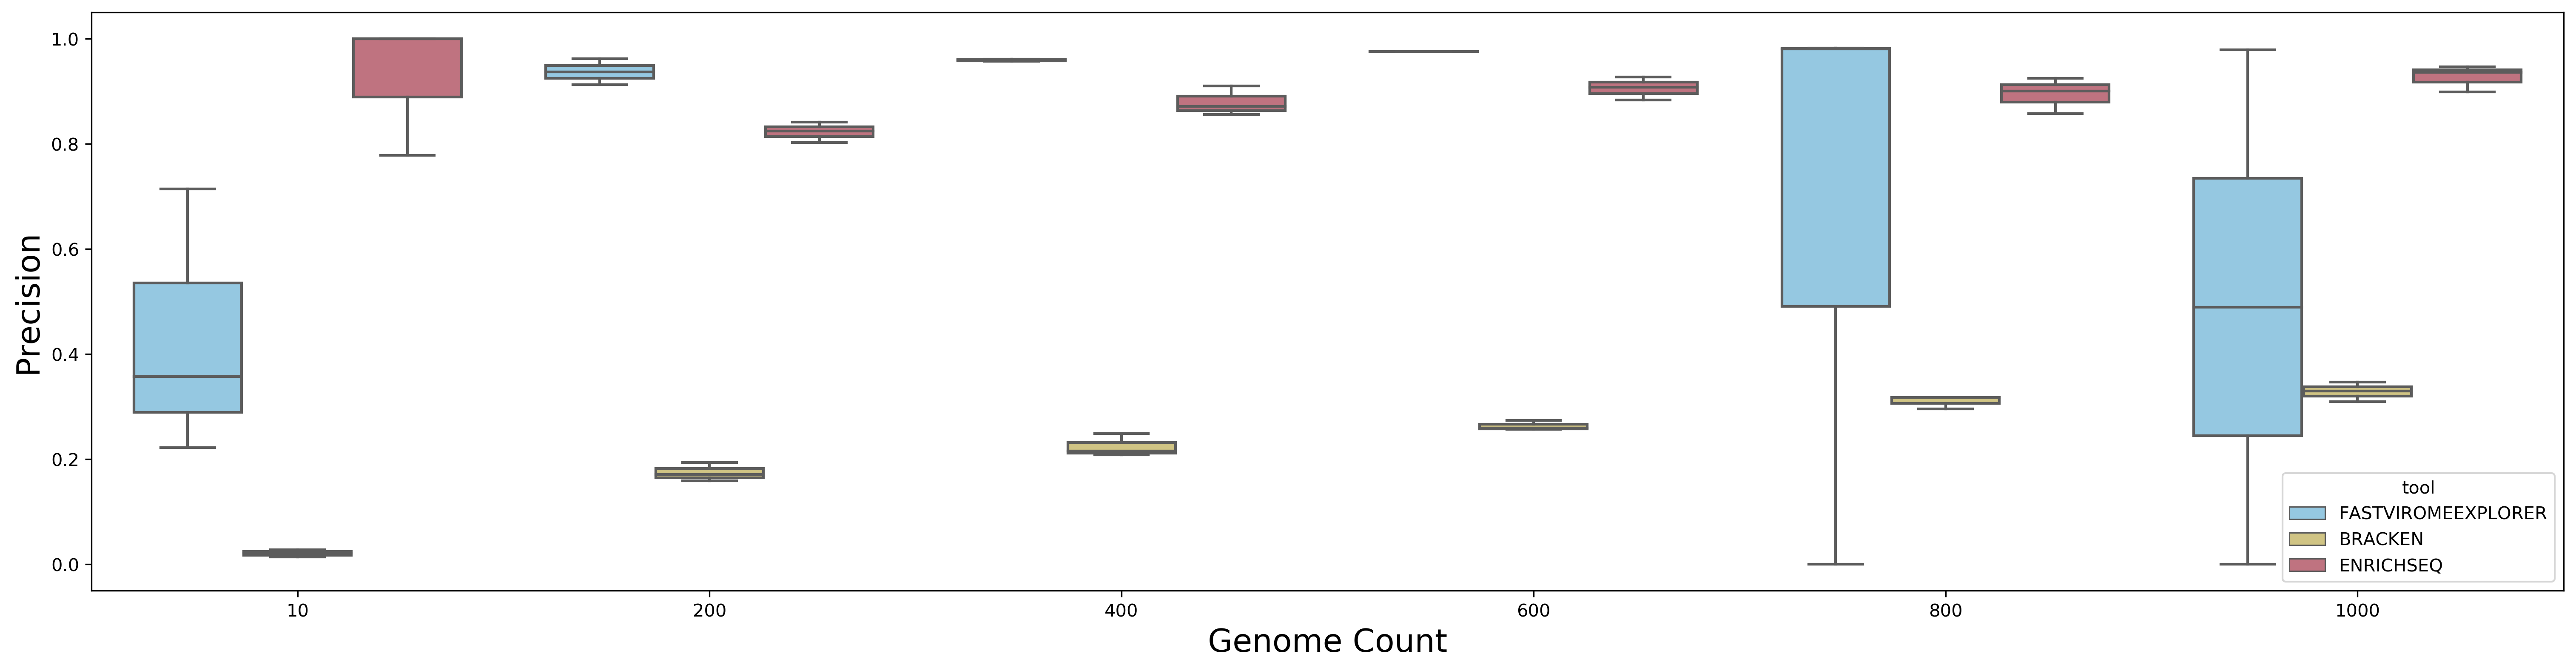

In [20]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_genomes_df = results_df[results_df['experiment'] == 'num_genomes']


# choose EnrichSeq version and plot
#sns.violinplot(data=num_genomes_df, x="num_genomes", y="f1_score", hue="tool", scale='width', width=0.8, scale_hue=False, palette=colorblind_palette)
sns.boxplot(data=num_genomes_df, x="num_genomes", y="precision", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

#### Recall (num_genomes)

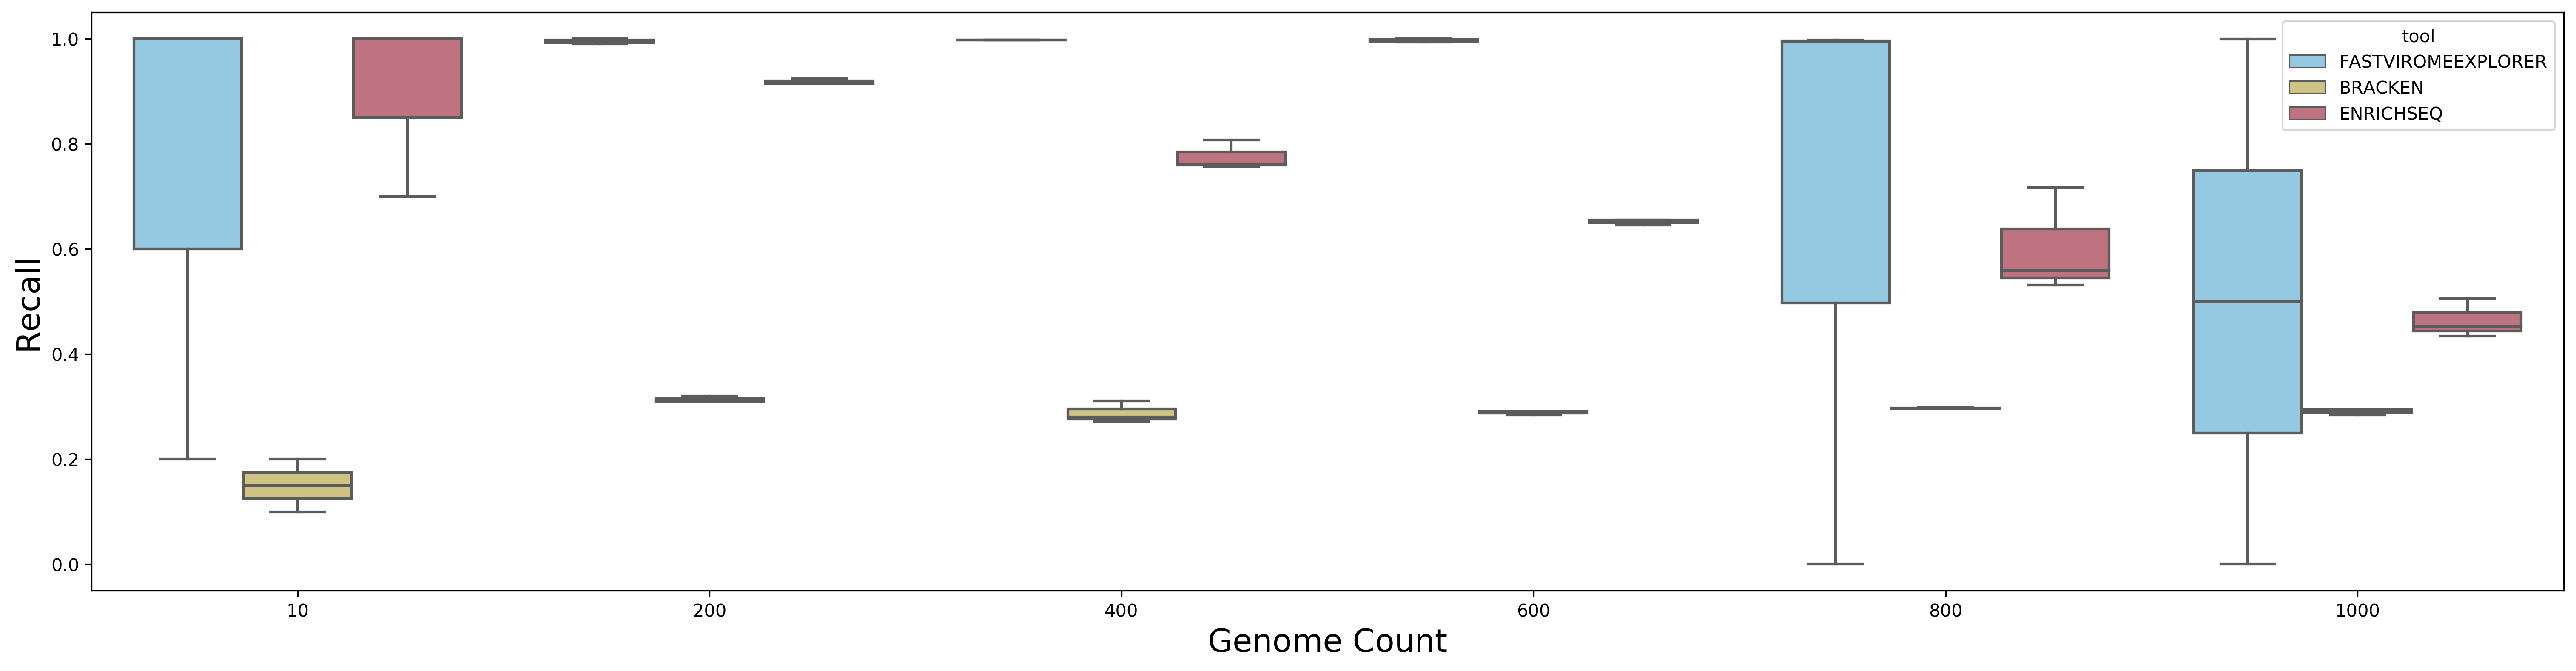

In [45]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_genomes_df = results_df[results_df['experiment'] == 'num_genomes']

# choose EnrichSeq version and plot
#sns.violinplot(data=num_genomes_df, x="num_genomes", y="f1_score", hue="tool", scale='width', width=0.8, scale_hue=False, palette=colorblind_palette)
sns.boxplot(data=num_genomes_df, x="num_genomes", y="recall", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

### 2.2 *Number of Reads (200 genomes)* experiment

#### F1 Score

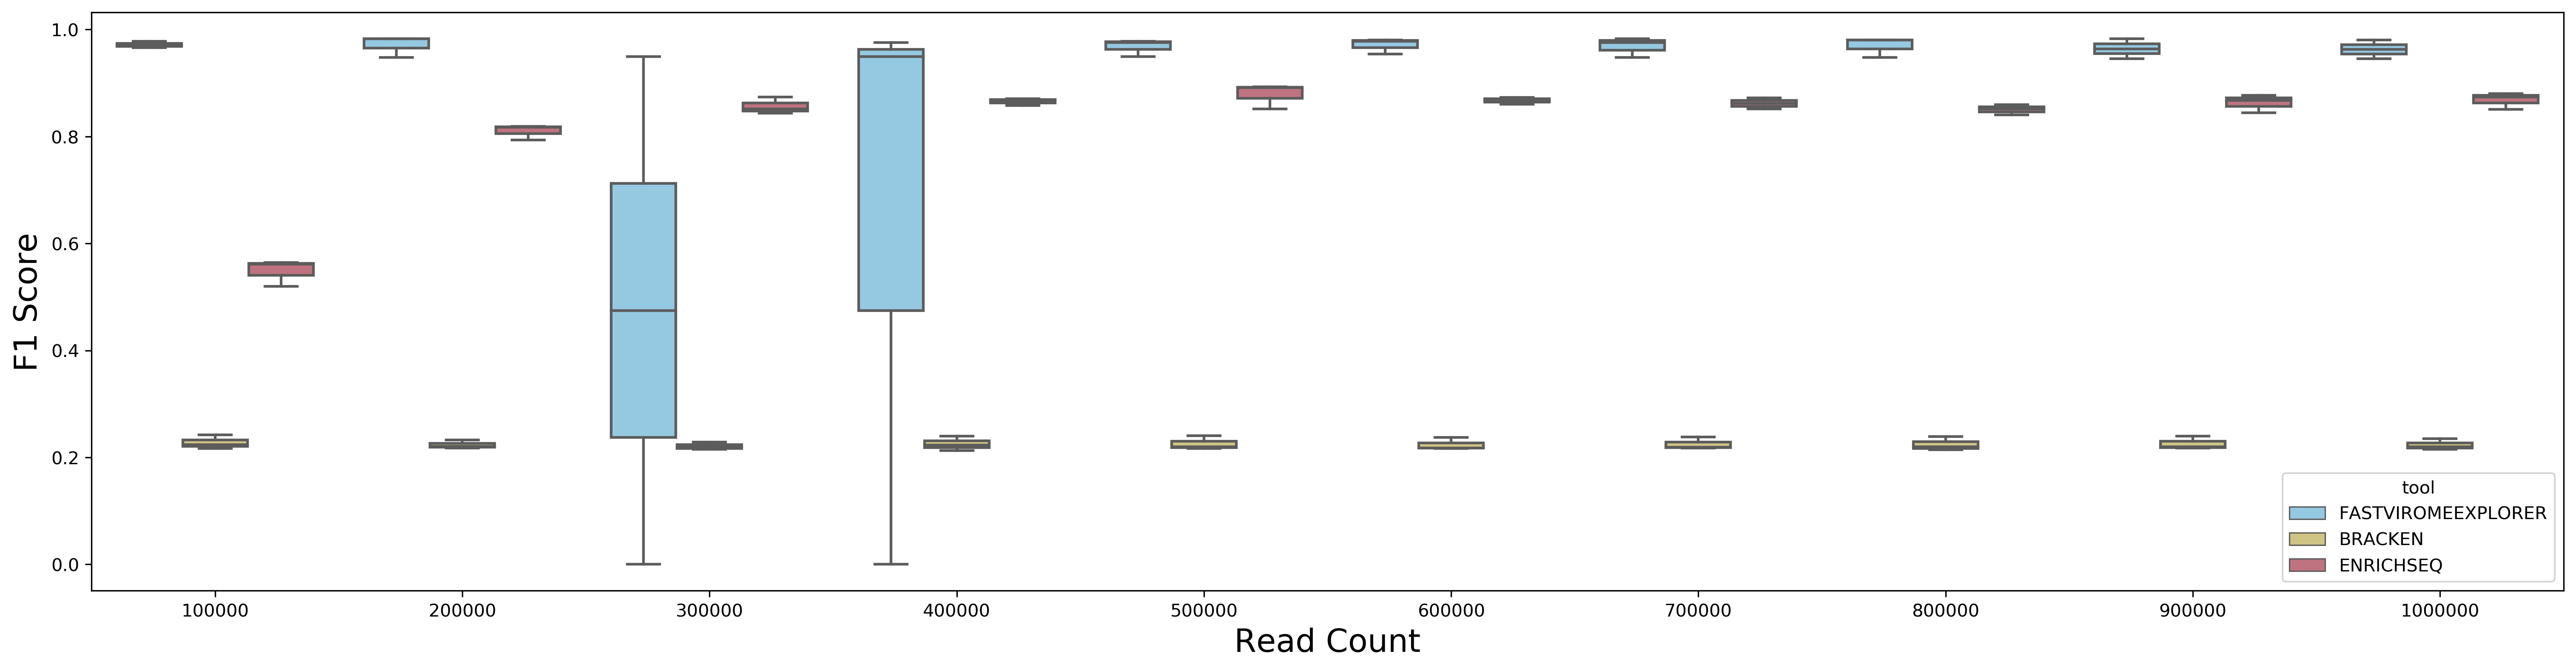

In [50]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads200_df = results_df[results_df['experiment'] == 'num_reads_200genomes']

# choose EnrichSeq version and plot
sns.boxplot(data=num_reads200_df, x="num_reads", y="f1_score", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.show()

#### Precision (num_reads_200genomes)

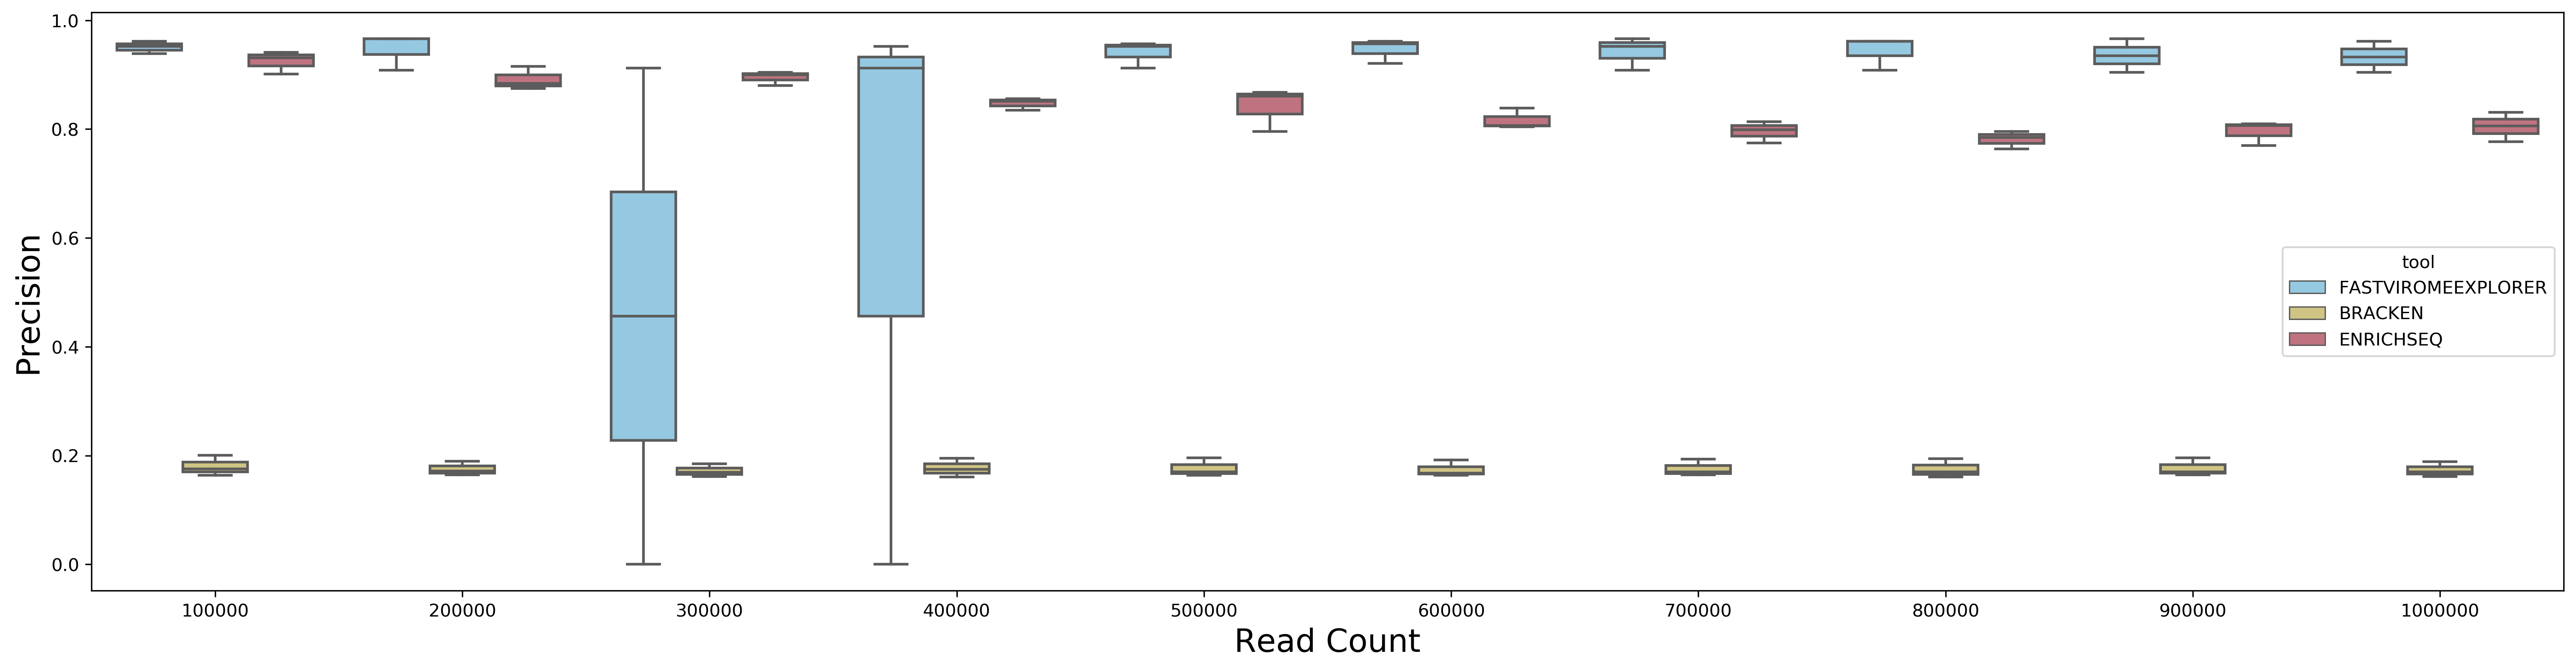

In [51]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads200_df = results_df[results_df['experiment'] == 'num_reads_200genomes']

# choose EnrichSeq version and plot
sns.boxplot(data=num_reads200_df, x="num_reads", y="precision", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

#### Recall (num_reads_200genomes)

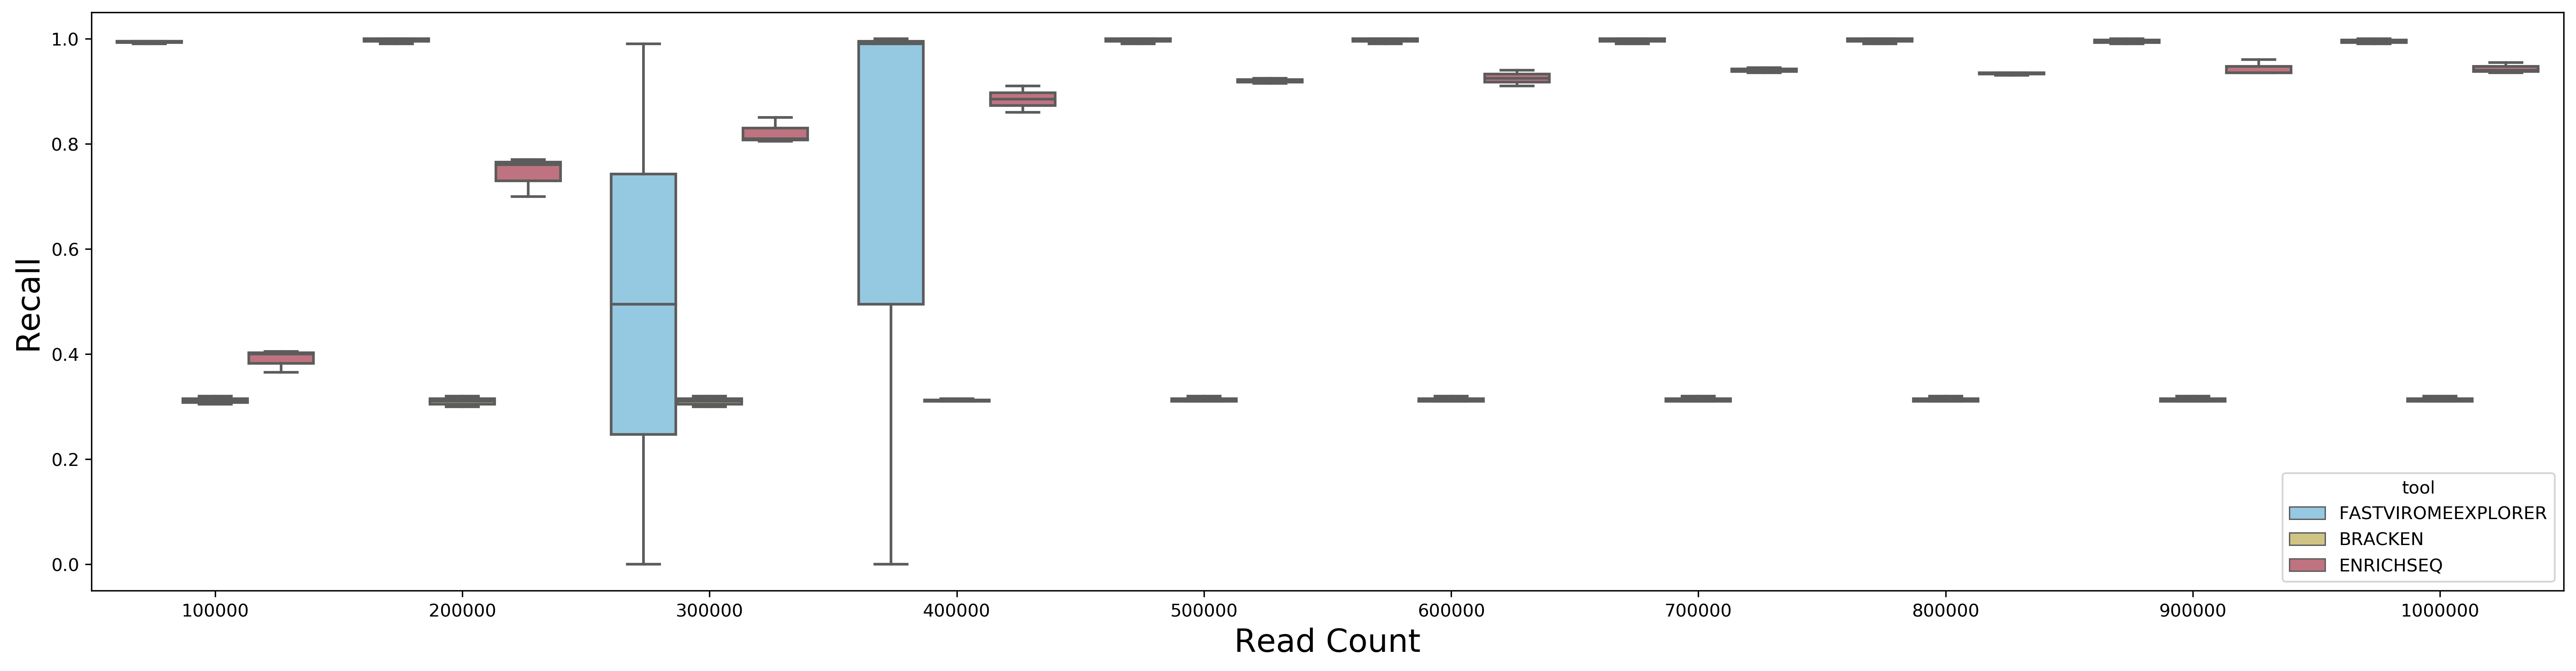

In [52]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads200_df = results_df[results_df['experiment'] == 'num_reads_200genomes']

# choose EnrichSeq version and plot
sns.boxplot(data=num_reads200_df, x="num_reads", y="recall", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

### 2.3 Number of reads (800 genomes)

#### F1 Score

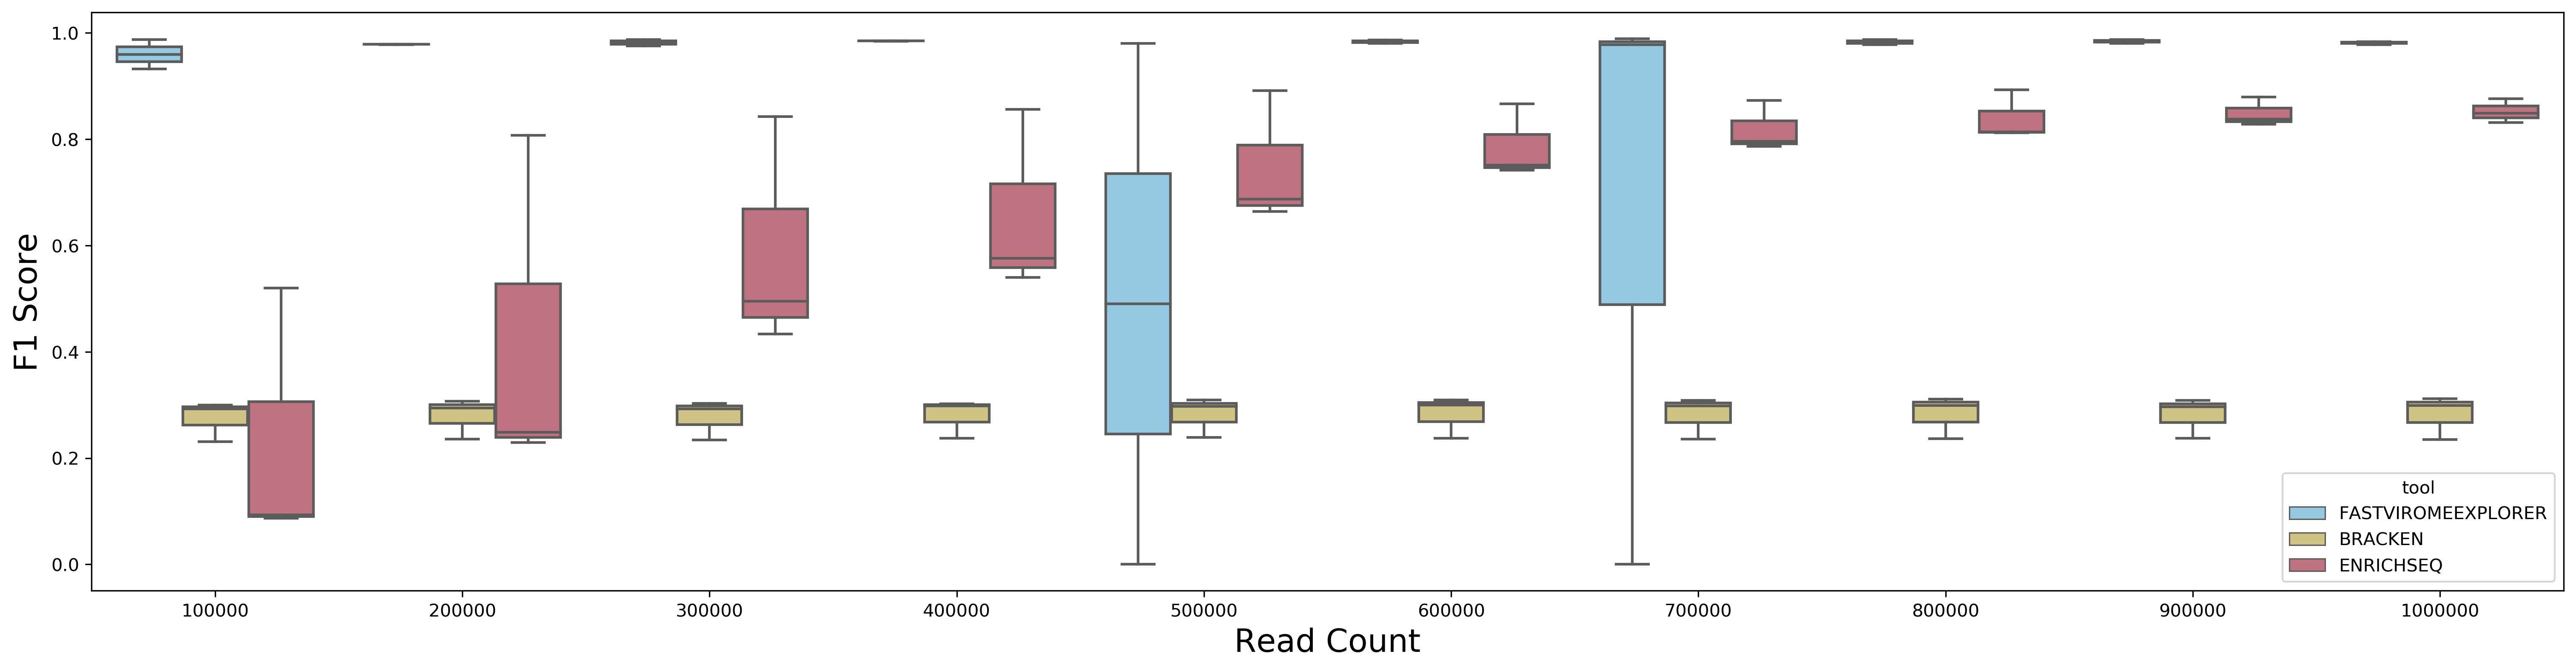

In [54]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads800_df = results_df[results_df['experiment'] == 'num_reads_800genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=num_reads800_df, x="num_reads", y="f1_score", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.show()

#### Precision

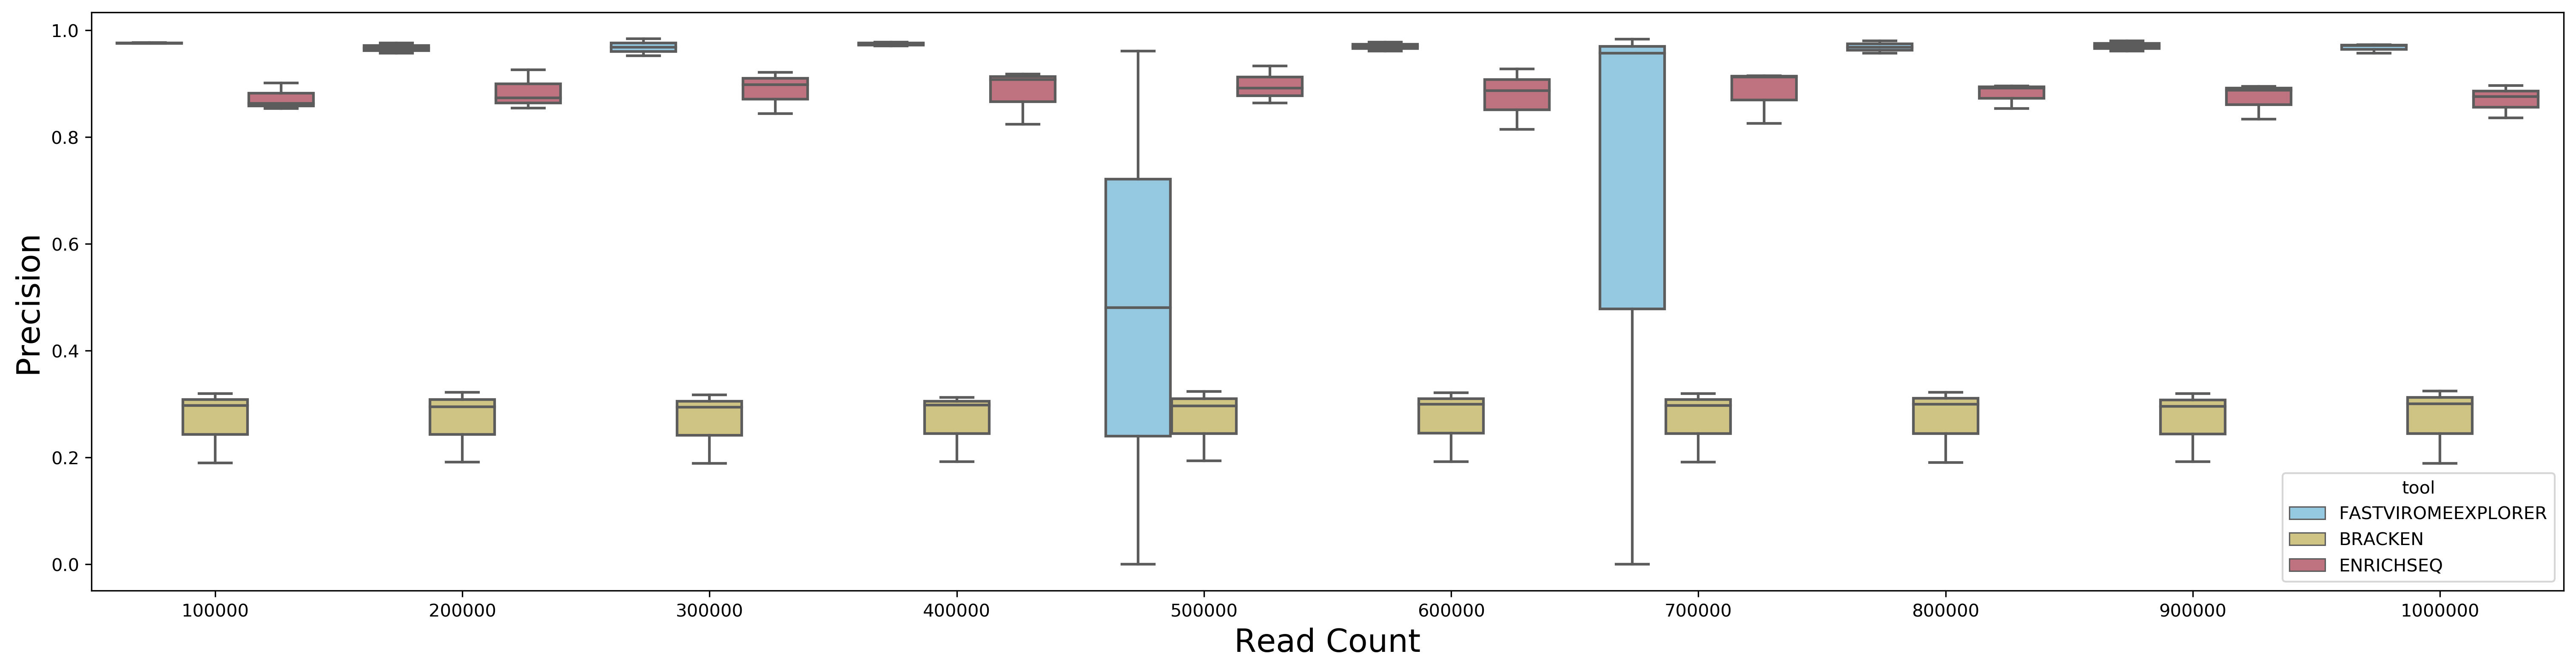

In [55]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads800_df = results_df[results_df['experiment'] == 'num_reads_800genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=num_reads800_df, x="num_reads", y="precision", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

#### Recall

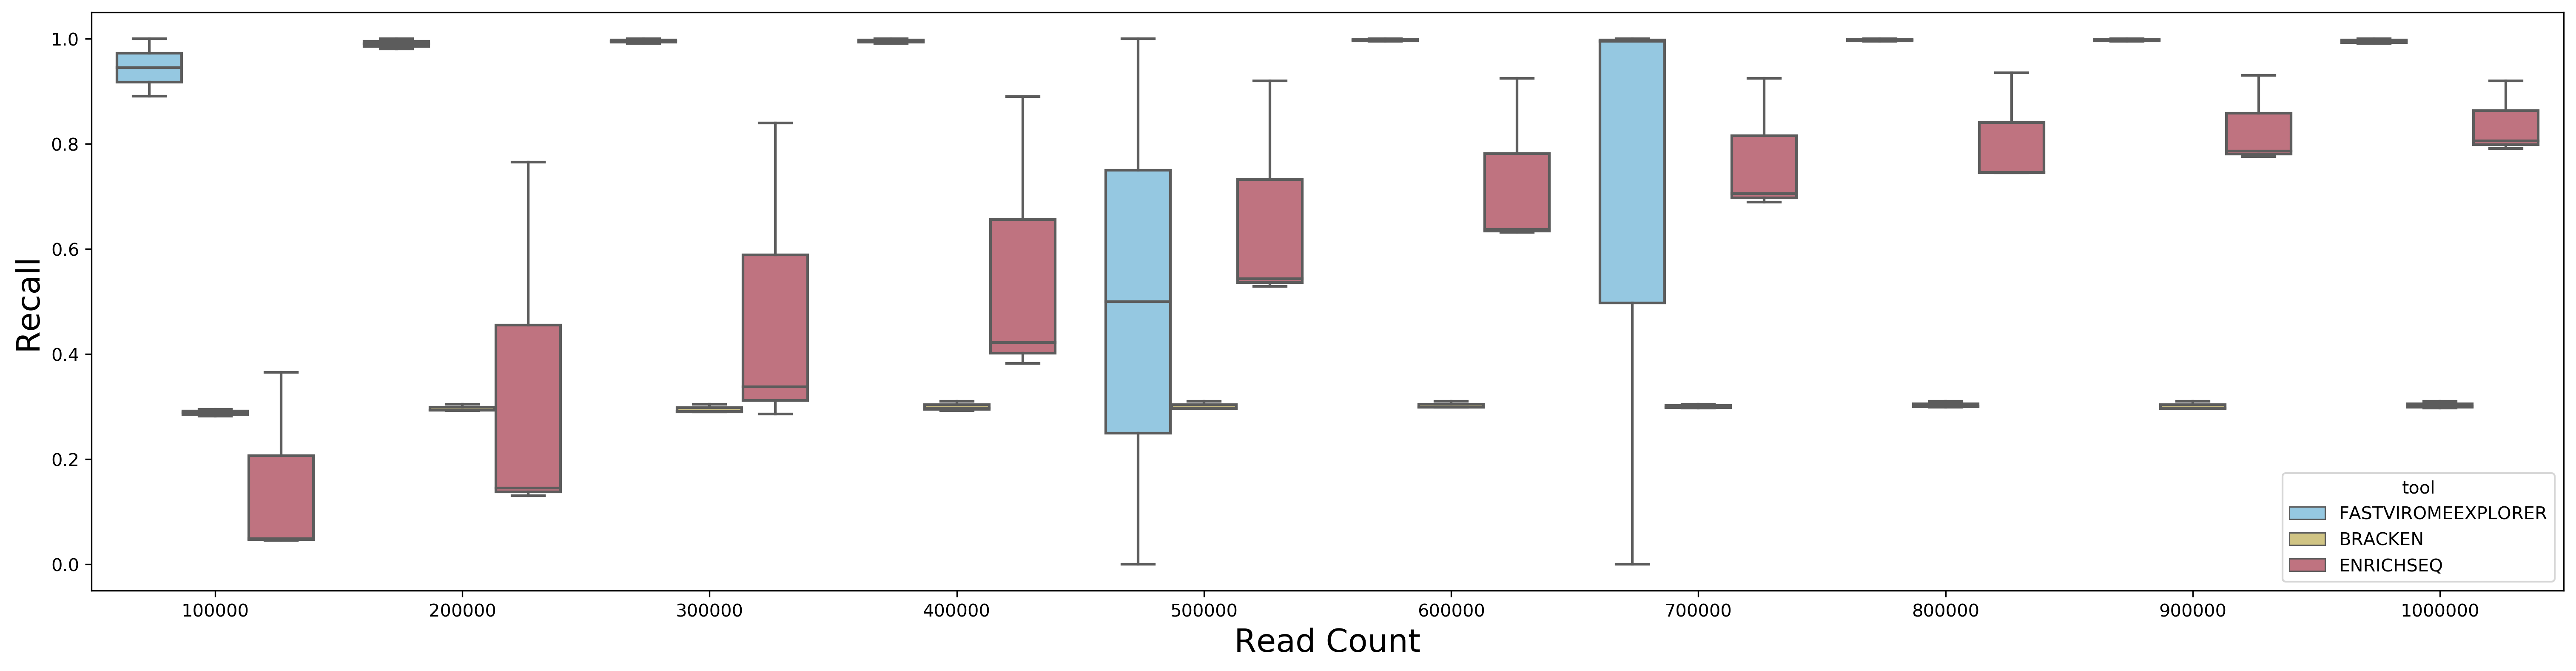

In [56]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads800_df = results_df[results_df['experiment'] == 'num_reads_800genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=num_reads800_df, x="num_reads", y="recall", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

## 3. Relative Abundance Estimation performance

### 3.1 *Number of Genomes* experiment

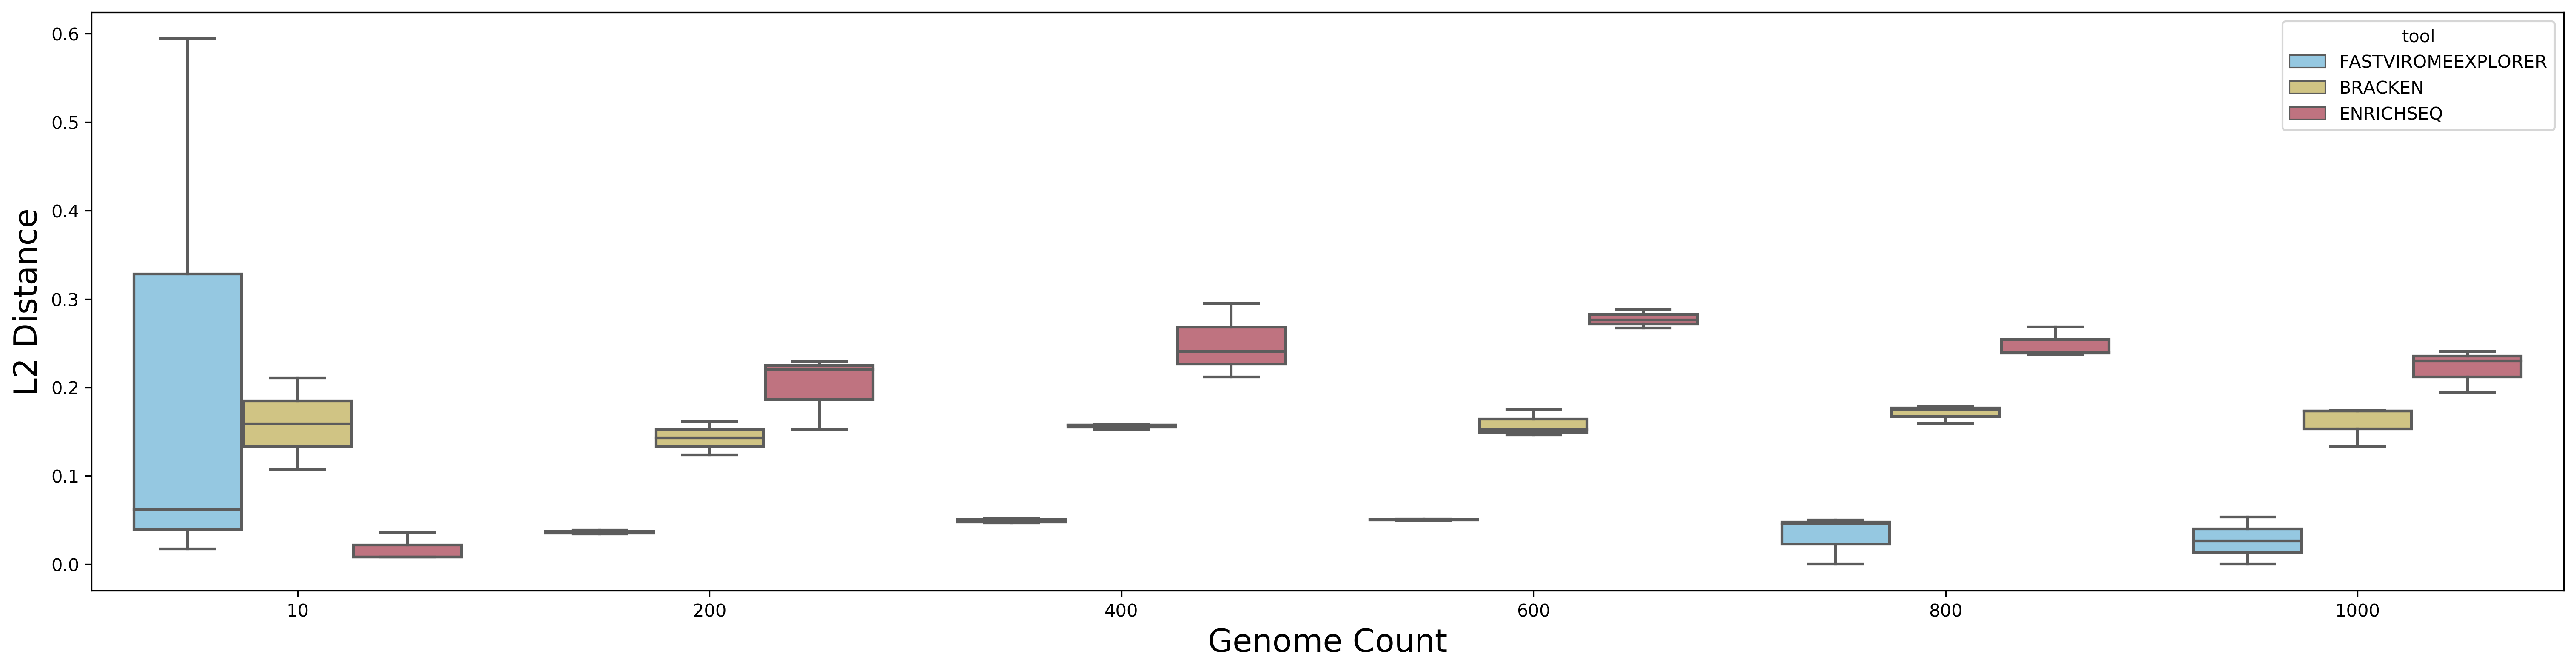

In [58]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_genomes_df = results_df[results_df['experiment'] == 'num_genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=num_genomes_df, x="num_genomes", y="l2_abundance", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('L2 Distance', fontsize=18)
plt.show()

### 3.2 *Number of Reads (200)* experiment

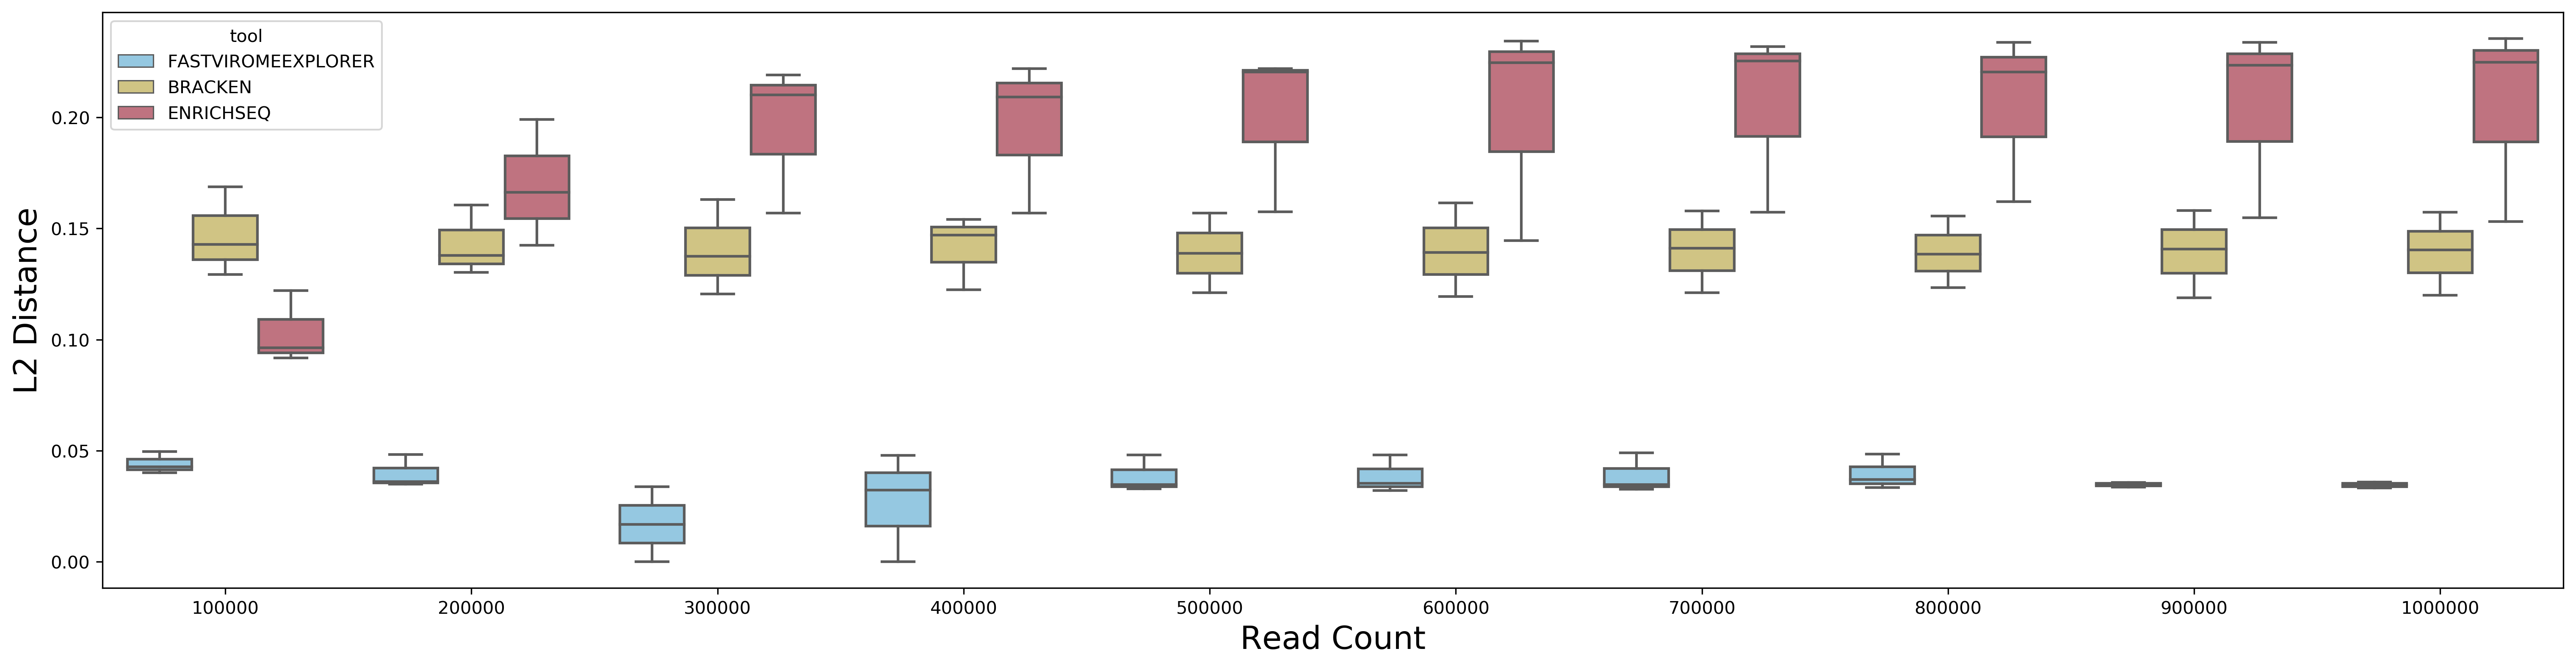

In [60]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads200_df = results_df[results_df['experiment'] == 'num_reads_200genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=num_reads200_df, x="num_reads", y="l2_abundance", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('L2 Distance', fontsize=18)
plt.show()

### 3.3 *Number of Reads (800)* experiment

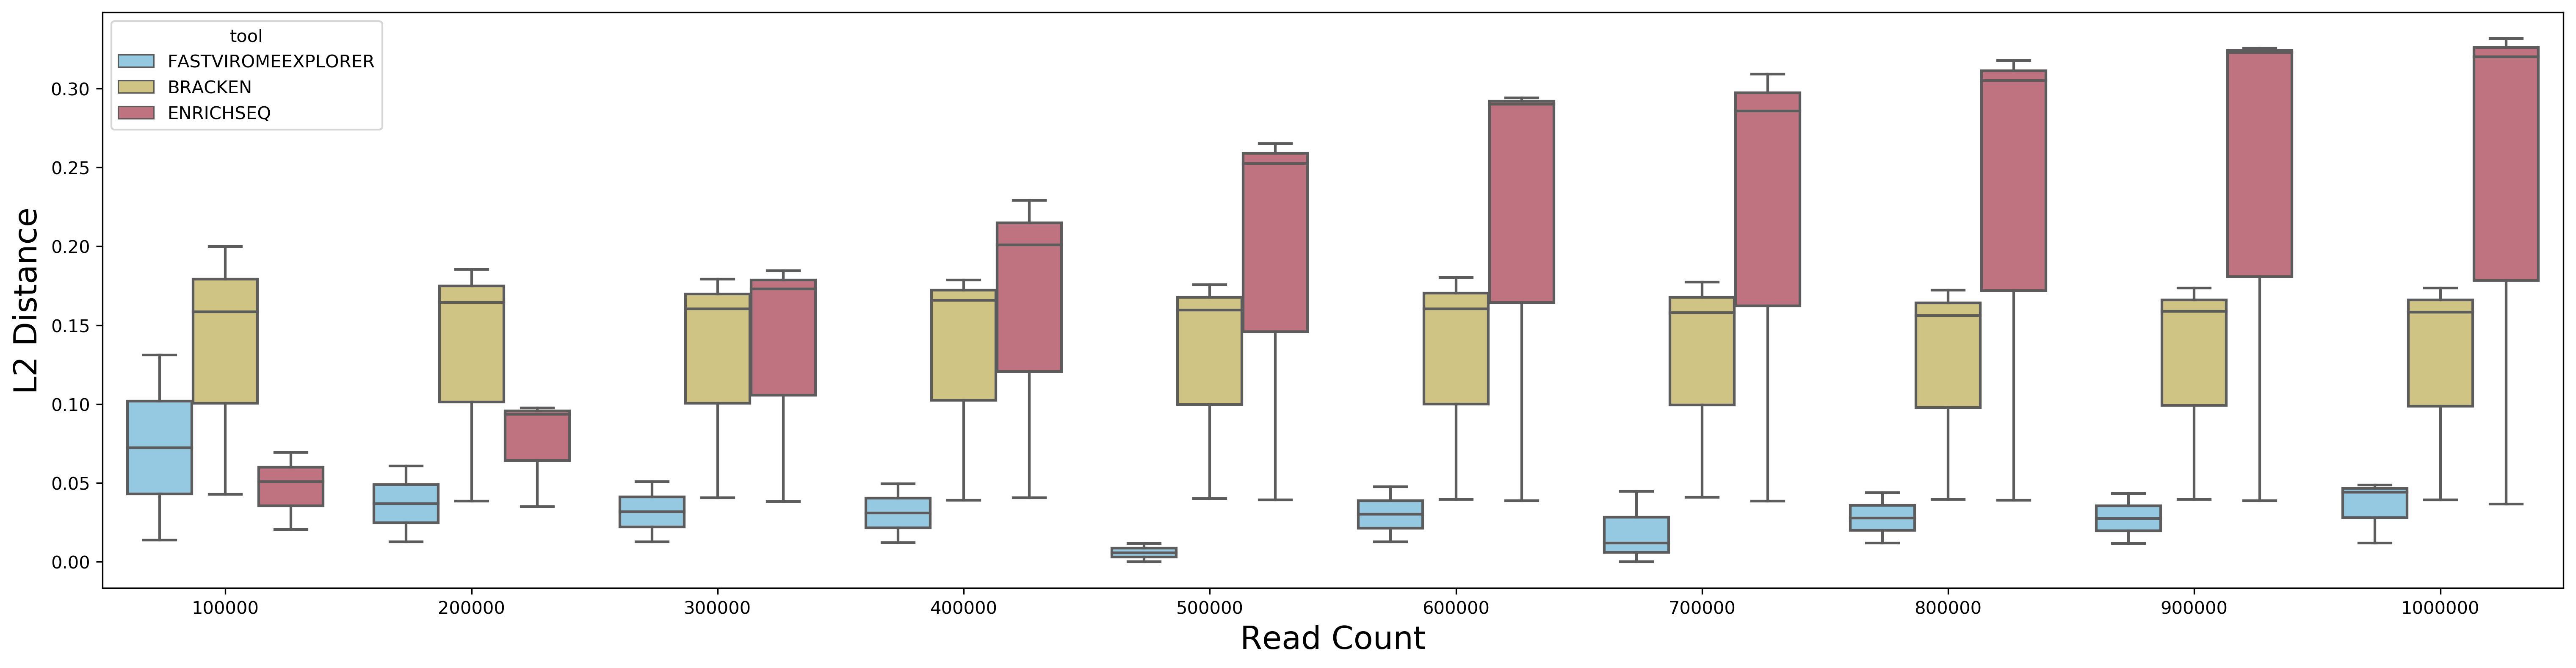

In [61]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
num_reads800_df = results_df[results_df['experiment'] == 'num_reads_800genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=num_reads800_df, x="num_reads", y="l2_abundance", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('L2 Distance', fontsize=18)
plt.show()

## Kraken+Bracken with and without assembly

In [14]:
filepath = "/projects/laal5512/benchmarking_output/bracken_results_26-OCT-22.csv" 
#filepath = '/Users/latifa/GitHub/benchmarking-enrichseq/10-11-2022_1411.csv'
results_df: pd.DataFrame = pd.read_csv(filepath)
    
#bracken_df = results_df[(results_df['tool'] == 'BRACKEN_ASSEMBLED') | (results_df['tool'] == 'BRACKEN_NO_ASSEMBLY')]
results_df

,tool,trial_num,experiment,condition,num_genomes,num_reads,true_pos,false_pos,false_neg,precision,recall,f1_score,l2_abundance
0,BRACKEN_NO_ASSEMBLY,3,num_reads_800genomes,800_genomes_1000000_reads,800,1000000,232,590,541,0.282238,0.300129,0.290909,0.029690
1,BRACKEN_ASSEMBLED,3,num_reads_800genomes,800_genomes_1000000_reads,800,1000000,195,491,578,0.284257,0.252264,0.267306,0.162720
2,BRACKEN_NO_ASSEMBLY,3,num_reads_800genomes,800_genomes_200000_reads,800,200000,223,604,550,0.269649,0.288486,0.278750,0.035710
3,BRACKEN_ASSEMBLED,3,num_reads_800genomes,800_genomes_200000_reads,800,200000,21,94,752,0.182609,0.027167,0.047297,0.210054
4,BRACKEN_NO_ASSEMBLY,3,num_reads_800genomes,800_genomes_100000_reads,800,100000,221,588,552,0.273177,0.285899,0.279393,0.072605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,BRACKEN_ASSEMBLED,1,num_genomes,1000_genomes_500000_reads,1000,500000,123,328,651,0.272727,0.158915,0.200816,0.159356
152,BRACKEN_NO_ASSEMBLY,1,num_genomes,200_genomes_500000_reads,200,500000,70,246,130,0.221519,0.350000,0.271318,0.019840
153,BRACKEN_ASSEMBLED,1,num_genomes,200_genomes_500000_reads,200,500000,69,168,131,0.291139,0.345000,0.315789,0.163919
154,BRACKEN_NO_ASSEMBLY,1,num_genomes,800_genomes_500000_reads,800,500000,227,591,547,0.277506,0.293282,0.285176,0.029652


### Number of Genomes

#### Precision & Recall

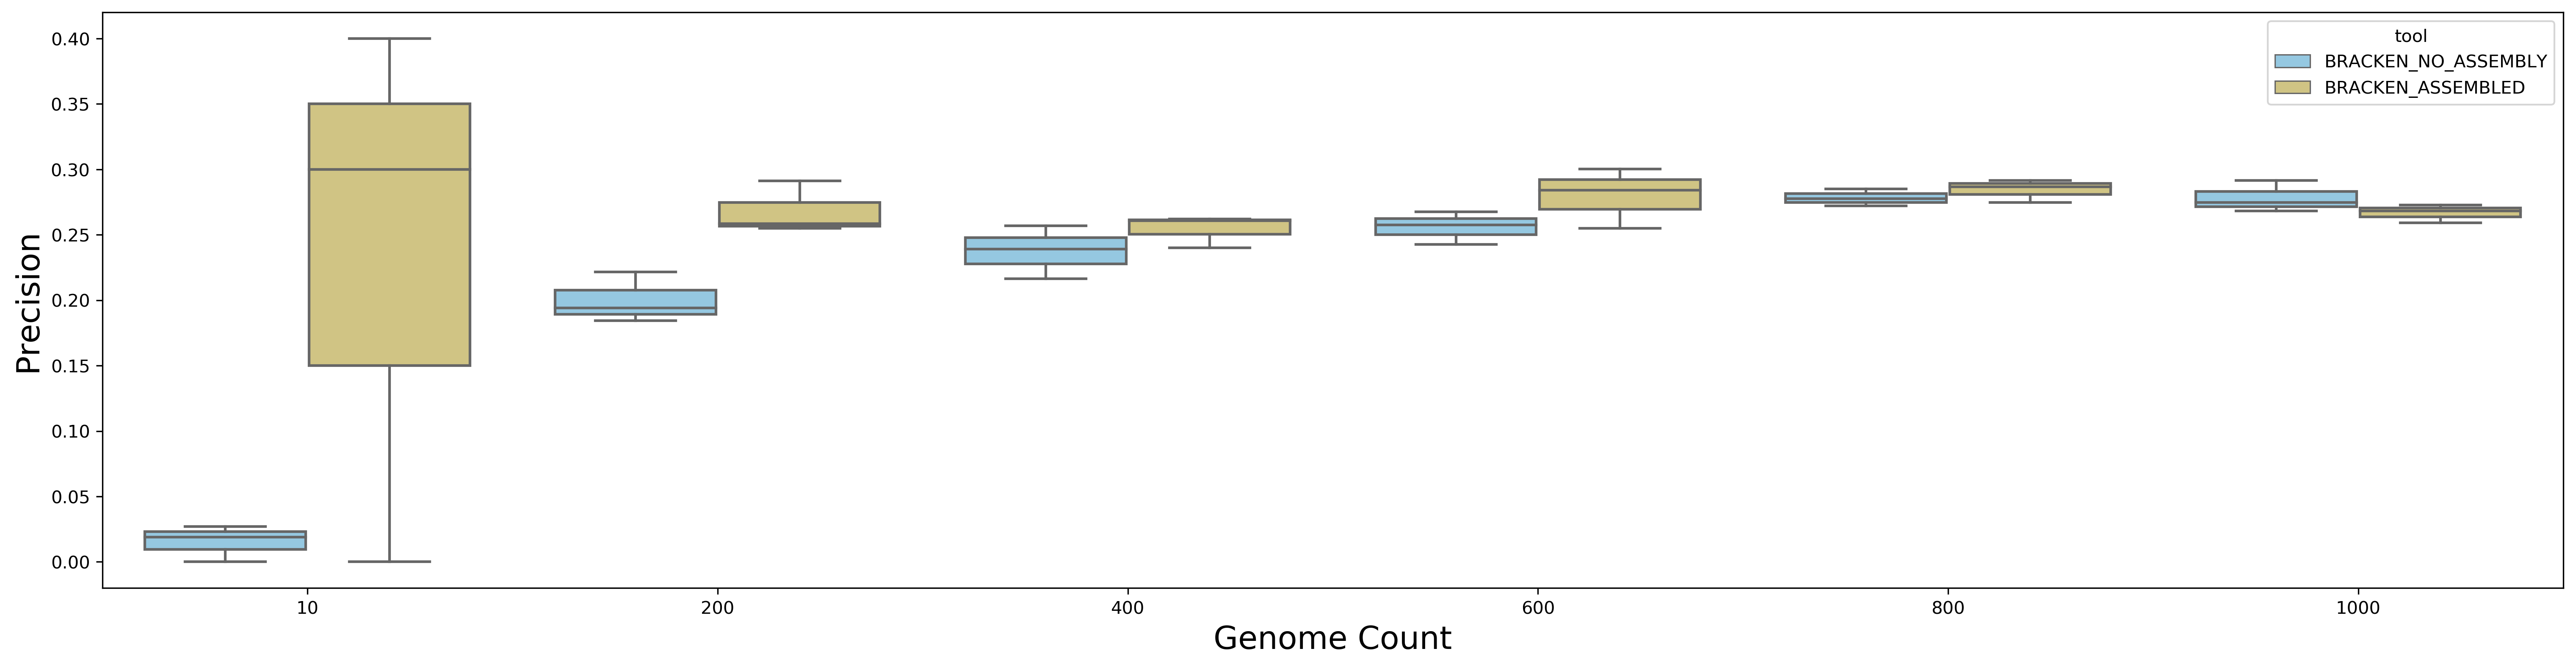

In [15]:
plt.figure(figsize=(25, 6), dpi=300)
genomes_bracken_df = results_df[results_df['experiment'] == 'num_genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=genomes_bracken_df, x="num_genomes", y="precision", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

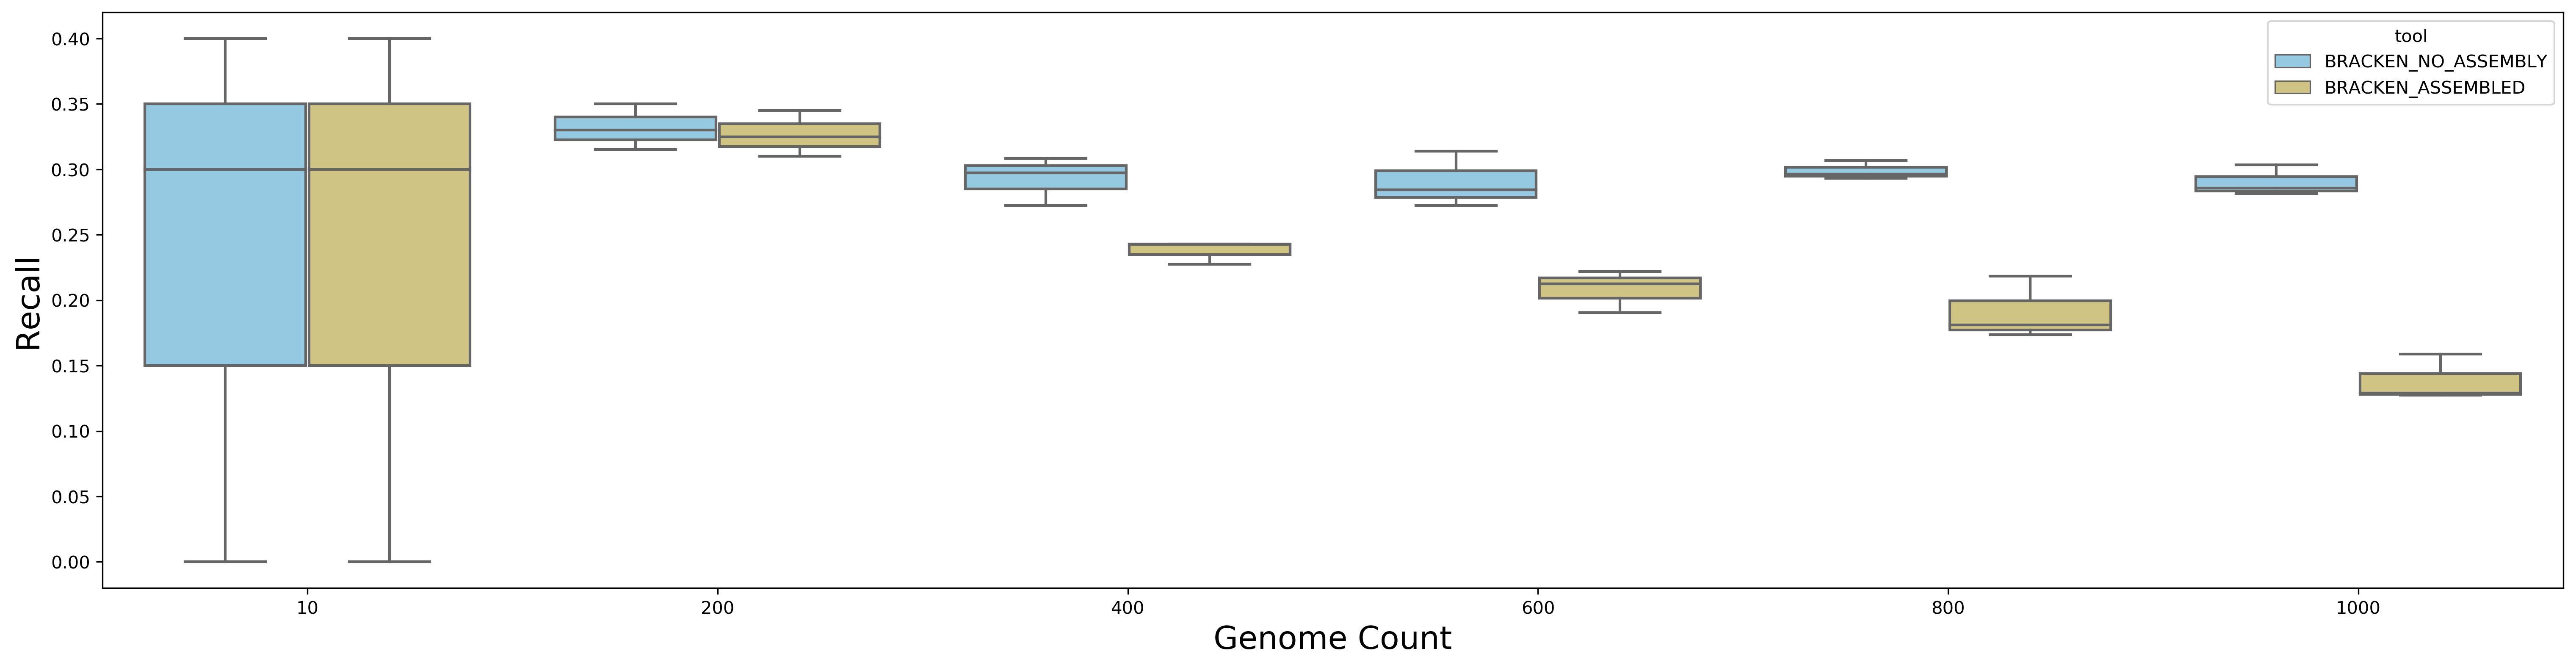

In [16]:
plt.figure(figsize=(25, 6), dpi=300)
genomes_bracken_df = results_df[results_df['experiment'] == 'num_genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=genomes_bracken_df, x="num_genomes", y="recall", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

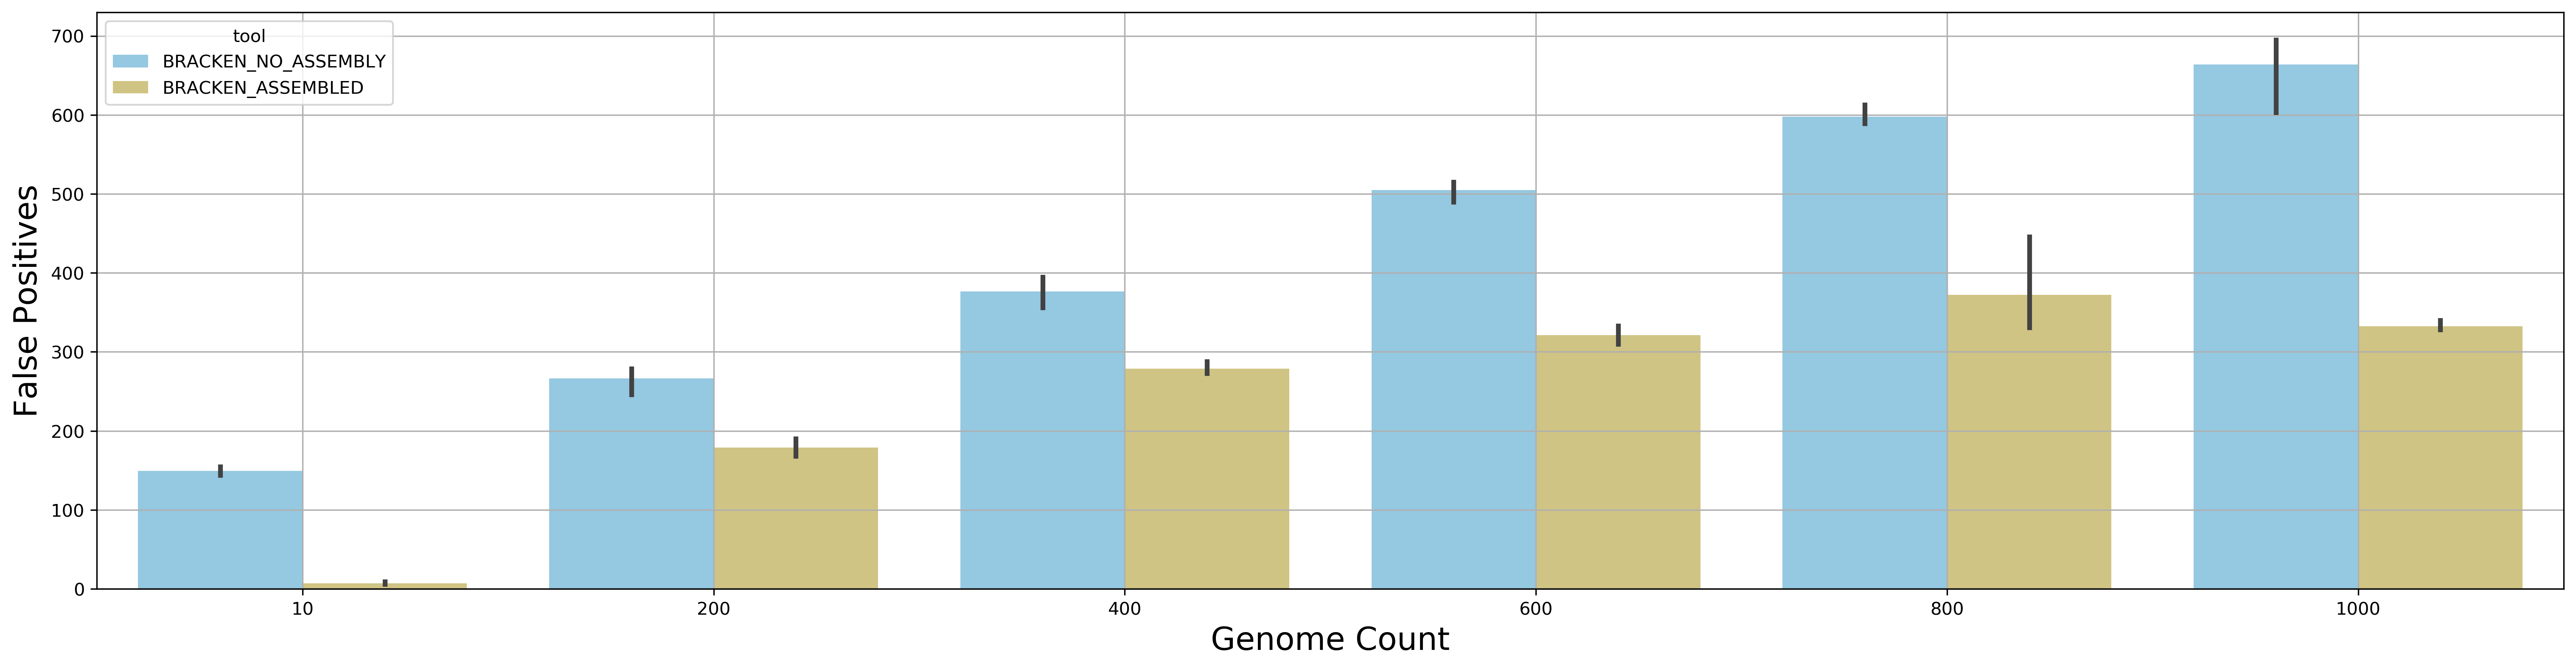

In [29]:
plt.figure(figsize=(25, 6), dpi=300)
genomes_bracken_df = results_df[results_df['experiment'] == 'num_genomes']


# choose EnrichSeq version and plot
sns.barplot(data=genomes_bracken_df, x="num_genomes", y="false_pos", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('False Positives', fontsize=18)
plt.grid()
plt.show()

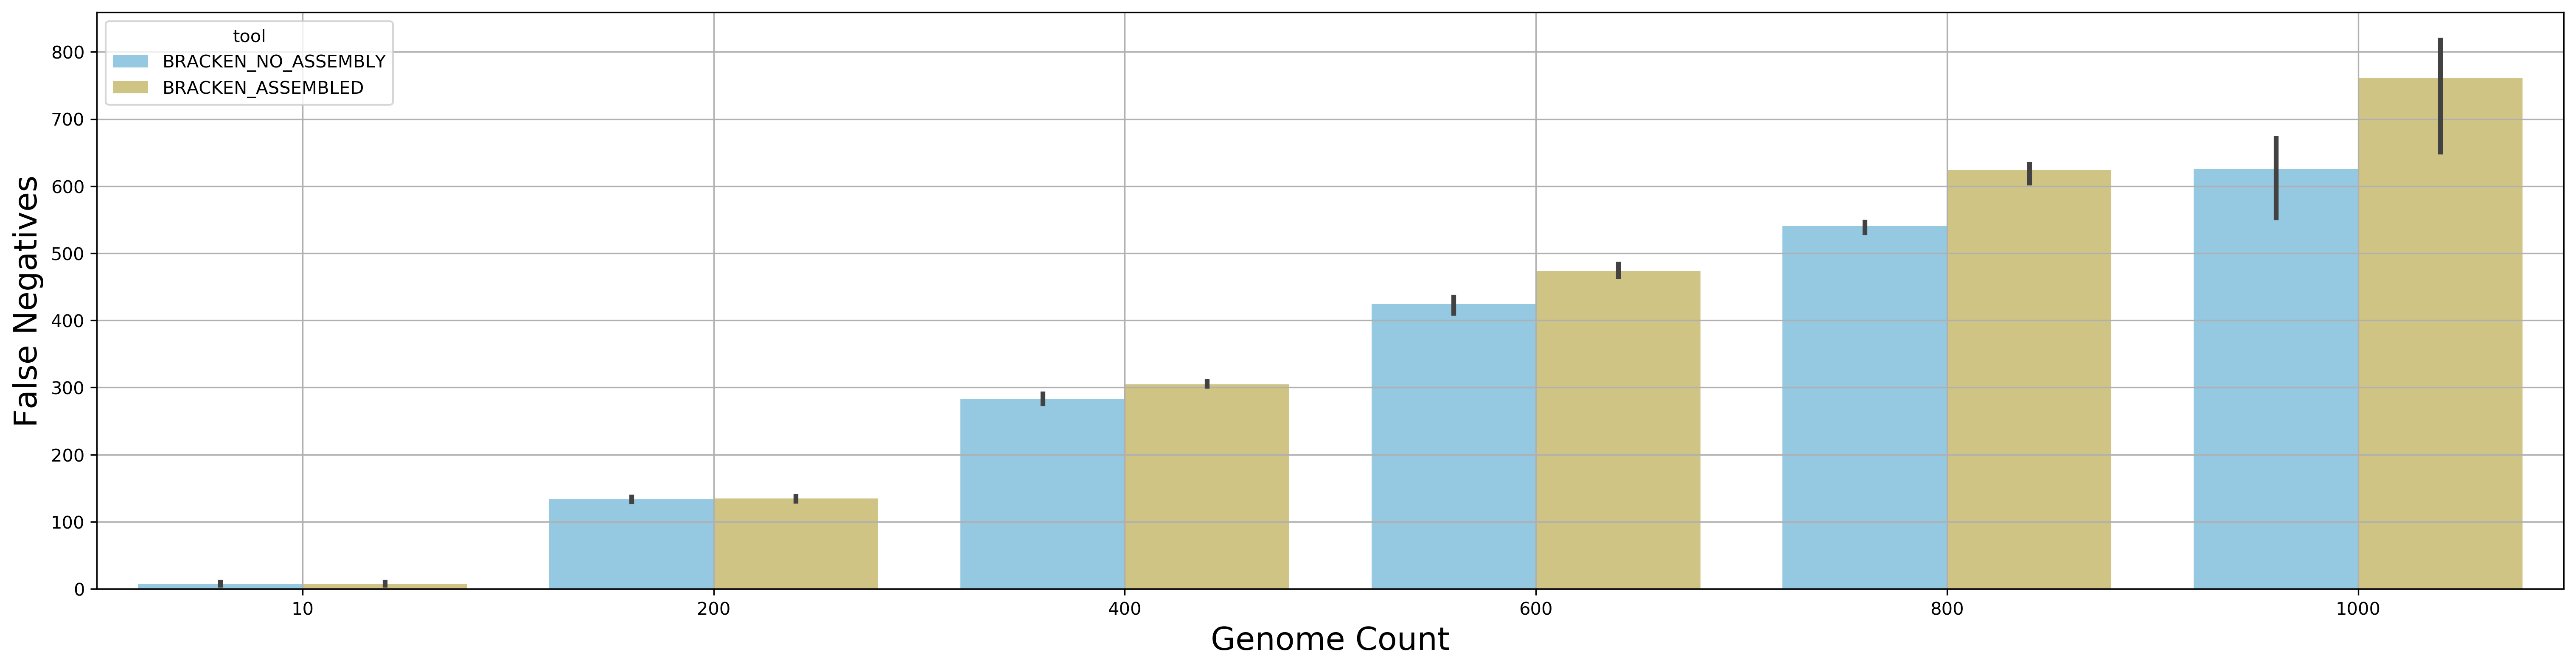

In [30]:
plt.figure(figsize=(25, 6), dpi=300)
genomes_bracken_df = results_df[results_df['experiment'] == 'num_genomes']


# choose EnrichSeq version and plot
sns.barplot(data=genomes_bracken_df, x="num_genomes", y="false_neg", hue="tool", palette=colorblind_palette)
plt.xlabel('Genome Count', fontsize=18)
plt.ylabel('False Negatives', fontsize=18)
plt.grid()
plt.show()

### Number of reads (200)

#### Precision

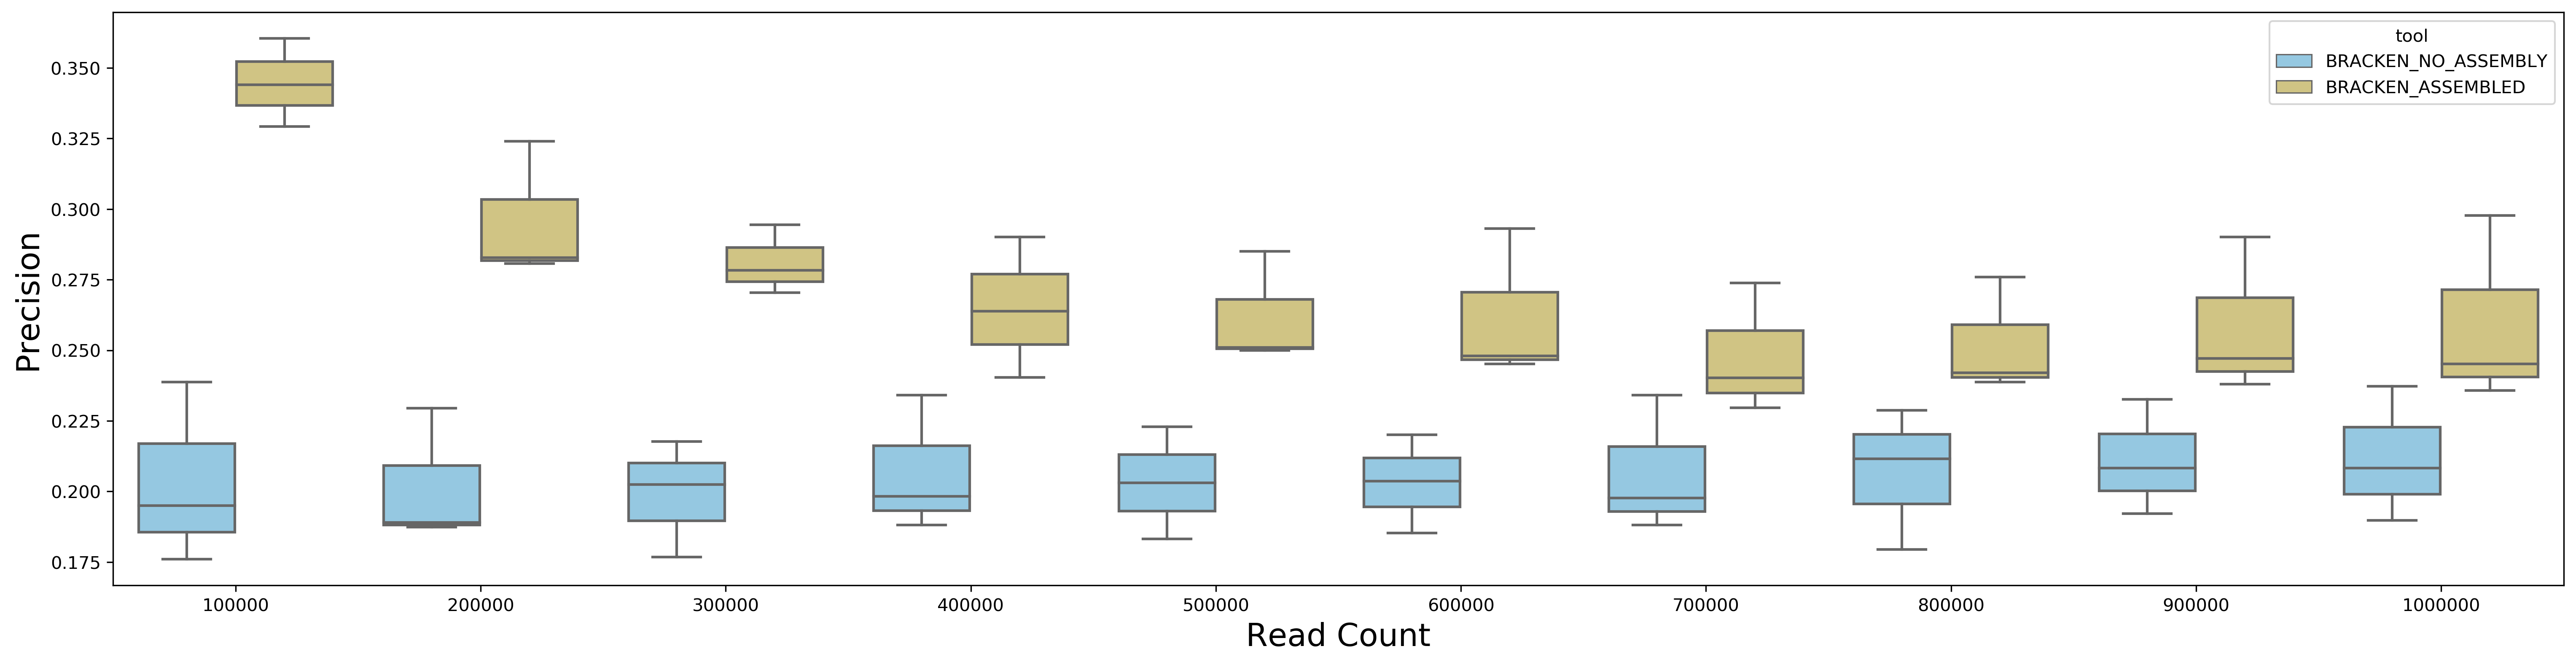

In [20]:
plt.figure(figsize=(25, 6), dpi=300)
reads200_bracken_df = results_df[results_df['experiment'] == 'num_reads_200genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=reads200_bracken_df, x="num_reads", y="precision", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

#### Recall

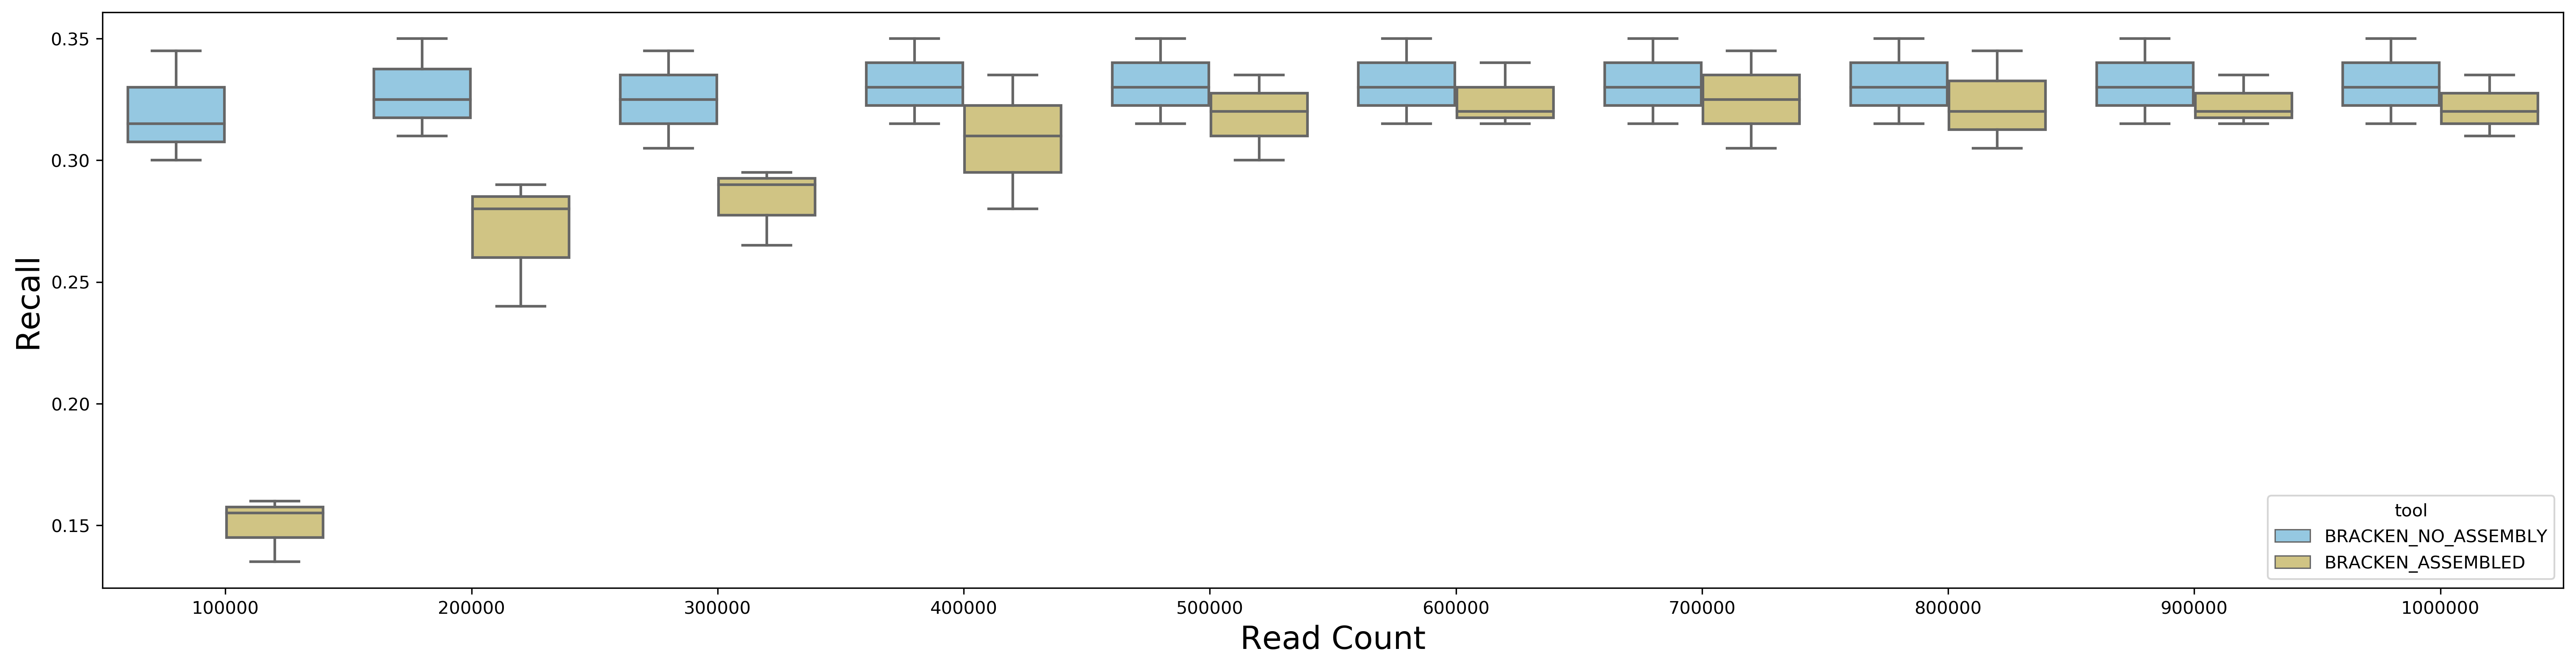

In [21]:
plt.figure(figsize=(25, 6), dpi=300)
reads200_bracken_df = results_df[results_df['experiment'] == 'num_reads_200genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=reads200_bracken_df, x="num_reads", y="recall", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

#### False positives

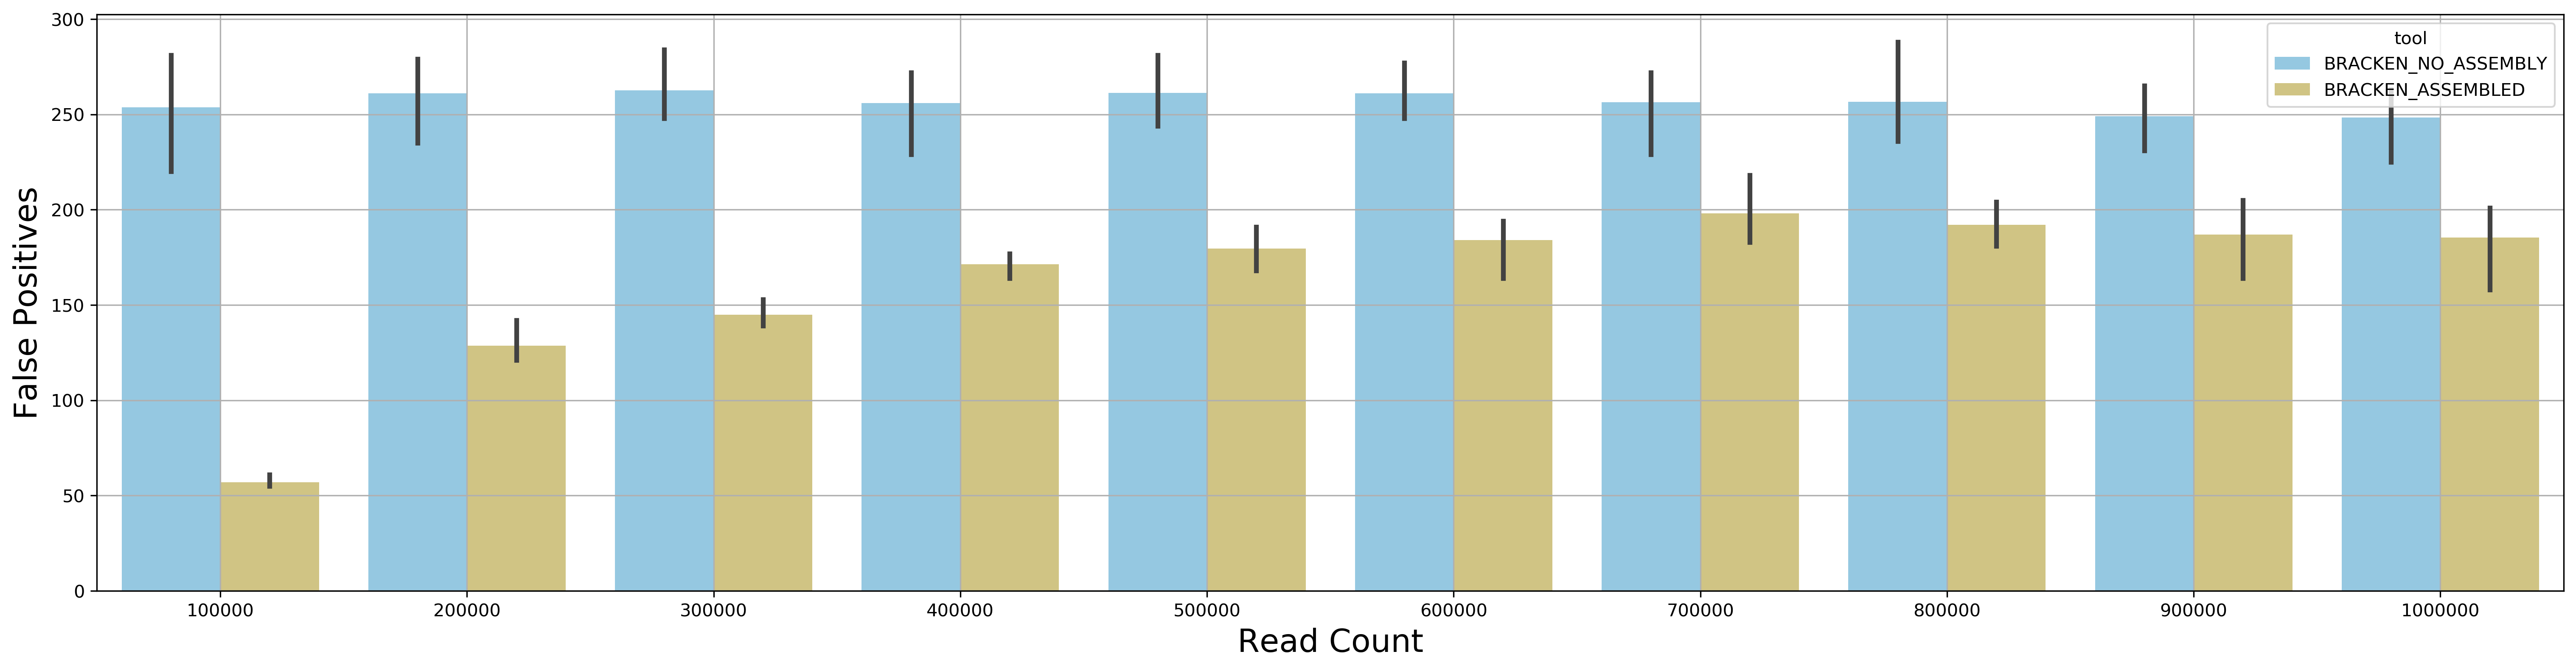

In [31]:
plt.figure(figsize=(25, 6), dpi=300)
reads200_bracken_df = results_df[results_df['experiment'] == 'num_reads_200genomes']


# choose EnrichSeq version and plot
sns.barplot(data=reads200_bracken_df, x="num_reads", y="false_pos", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('False Positives', fontsize=18)
plt.grid()
plt.show()

#### False negatives

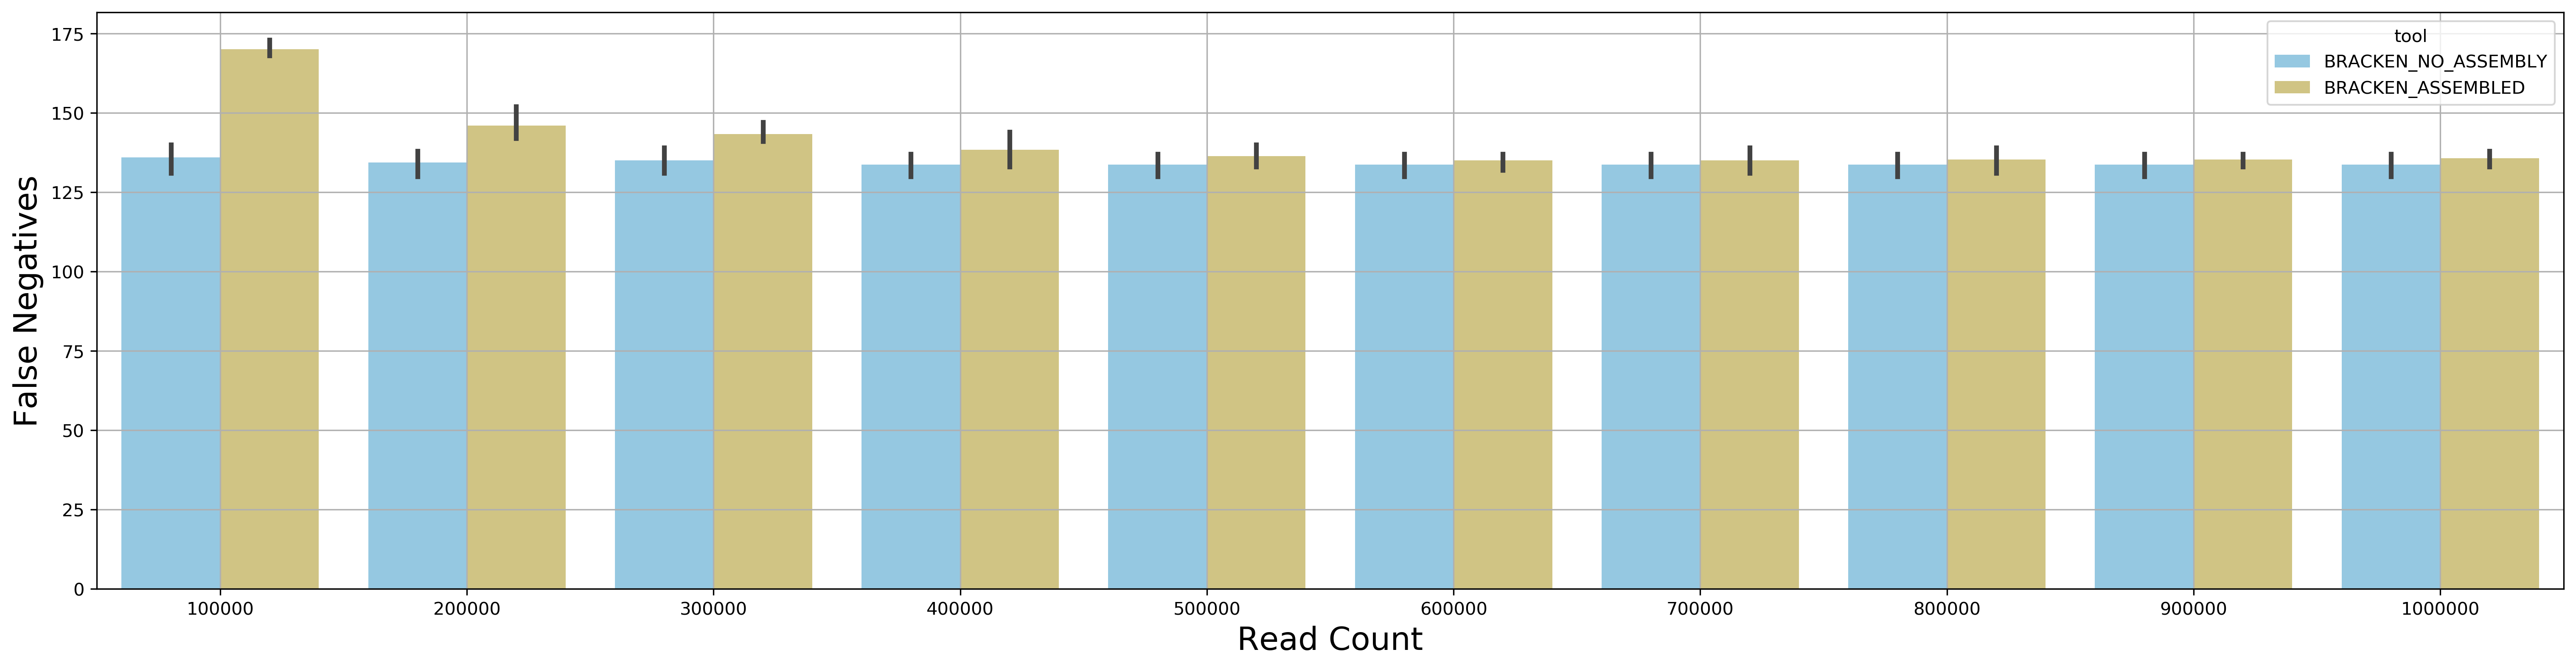

In [32]:
plt.figure(figsize=(25, 6), dpi=300)
reads200_bracken_df = results_df[results_df['experiment'] == 'num_reads_200genomes']


# choose EnrichSeq version and plot
sns.barplot(data=reads200_bracken_df, x="num_reads", y="false_neg", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('False Negatives', fontsize=18)
plt.grid()
plt.show()

### Number of reads (800)

#### Precision

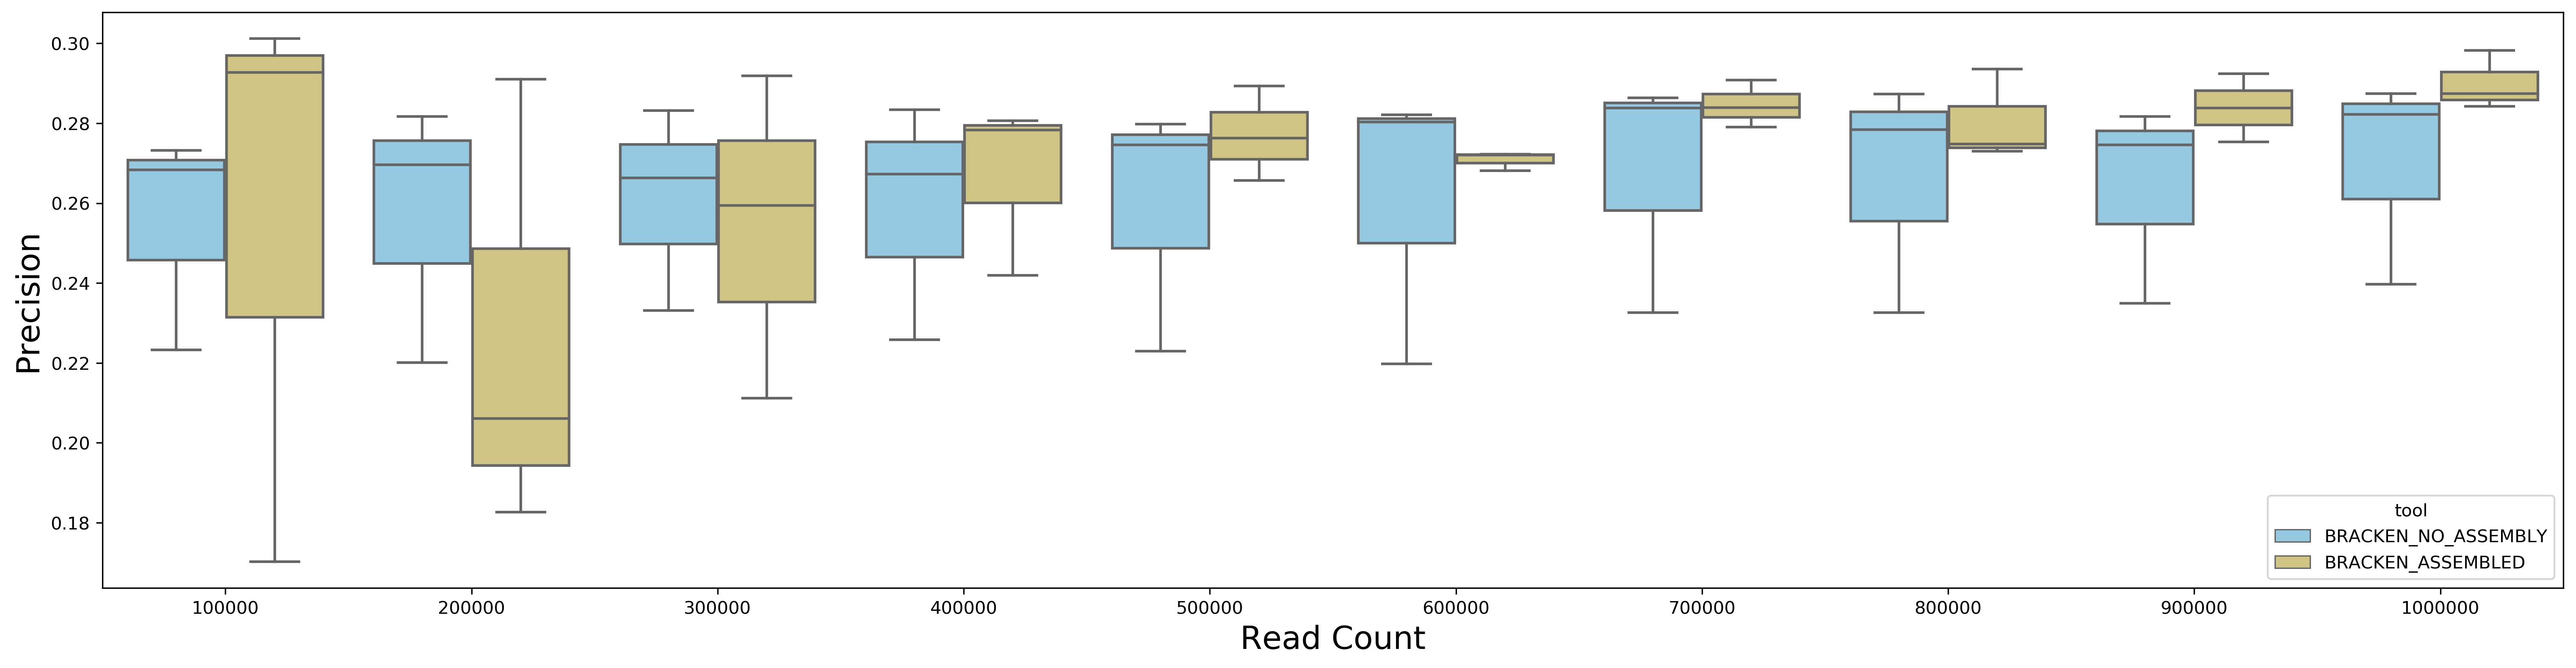

In [22]:
plt.figure(figsize=(25, 6), dpi=300)
reads800_bracken_df = results_df[results_df['experiment'] == 'num_reads_800genomes']

# choose EnrichSeq version and plot
sns.boxplot(data=reads800_bracken_df, x="num_reads", y="precision", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

#### Recall

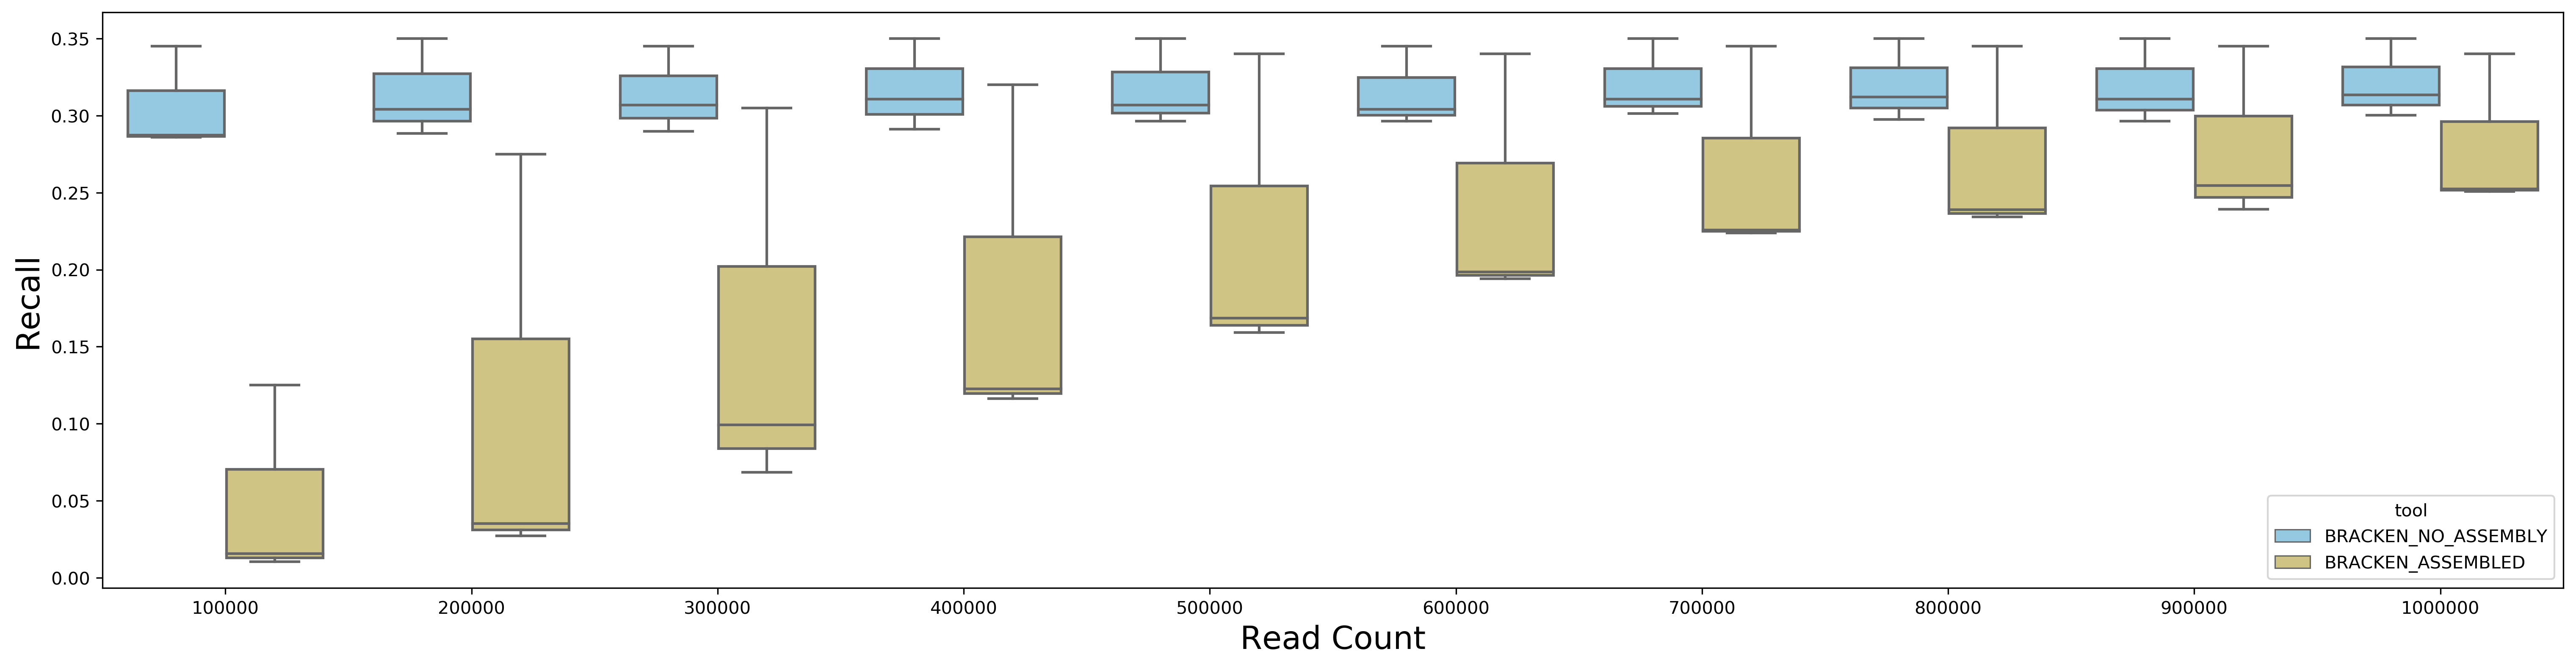

In [24]:
plt.figure(figsize=(25, 6), dpi=300)
reads800_bracken_df = results_df[results_df['experiment'] == 'num_reads_800genomes']


# choose EnrichSeq version and plot
sns.boxplot(data=reads800_bracken_df, x="num_reads", y="recall", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('Recall', fontsize=18)
plt.show()

#### False positives

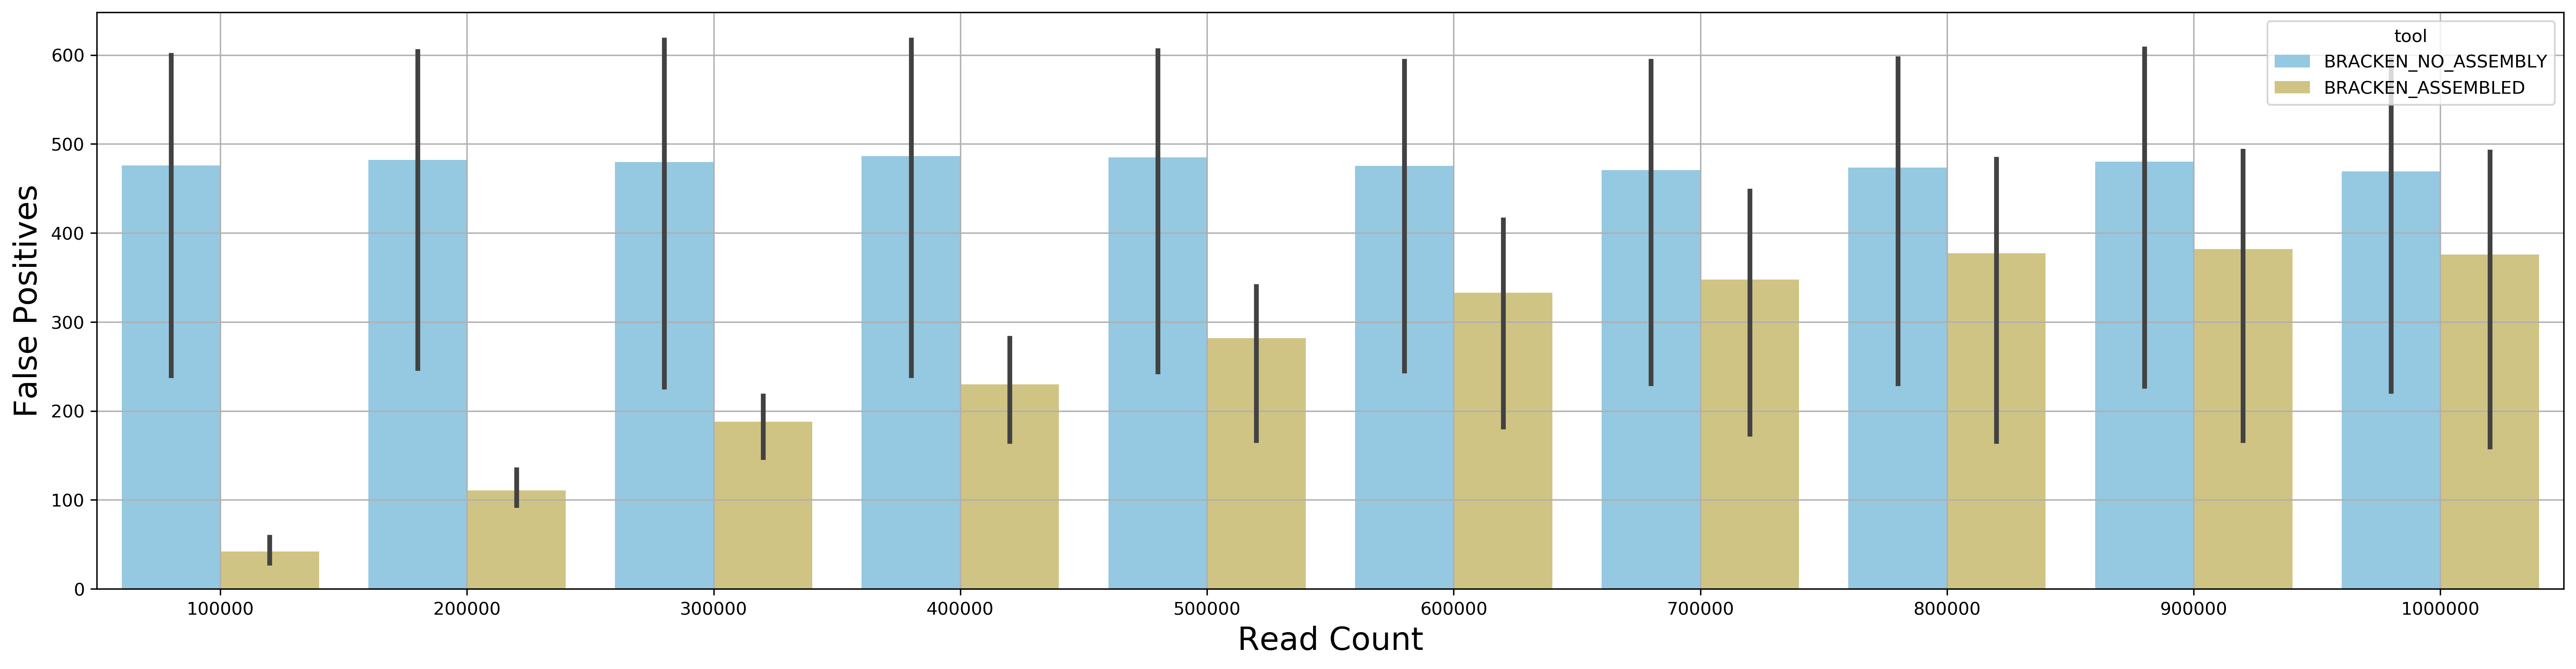

In [33]:
plt.figure(figsize=(25, 6), dpi=300)
reads800_bracken_df = results_df[results_df['experiment'] == 'num_reads_800genomes']


# choose EnrichSeq version and plot
sns.barplot(data=reads800_bracken_df, x="num_reads", y="false_pos", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('False Positives', fontsize=18)
plt.grid()
plt.show()

#### False negatives

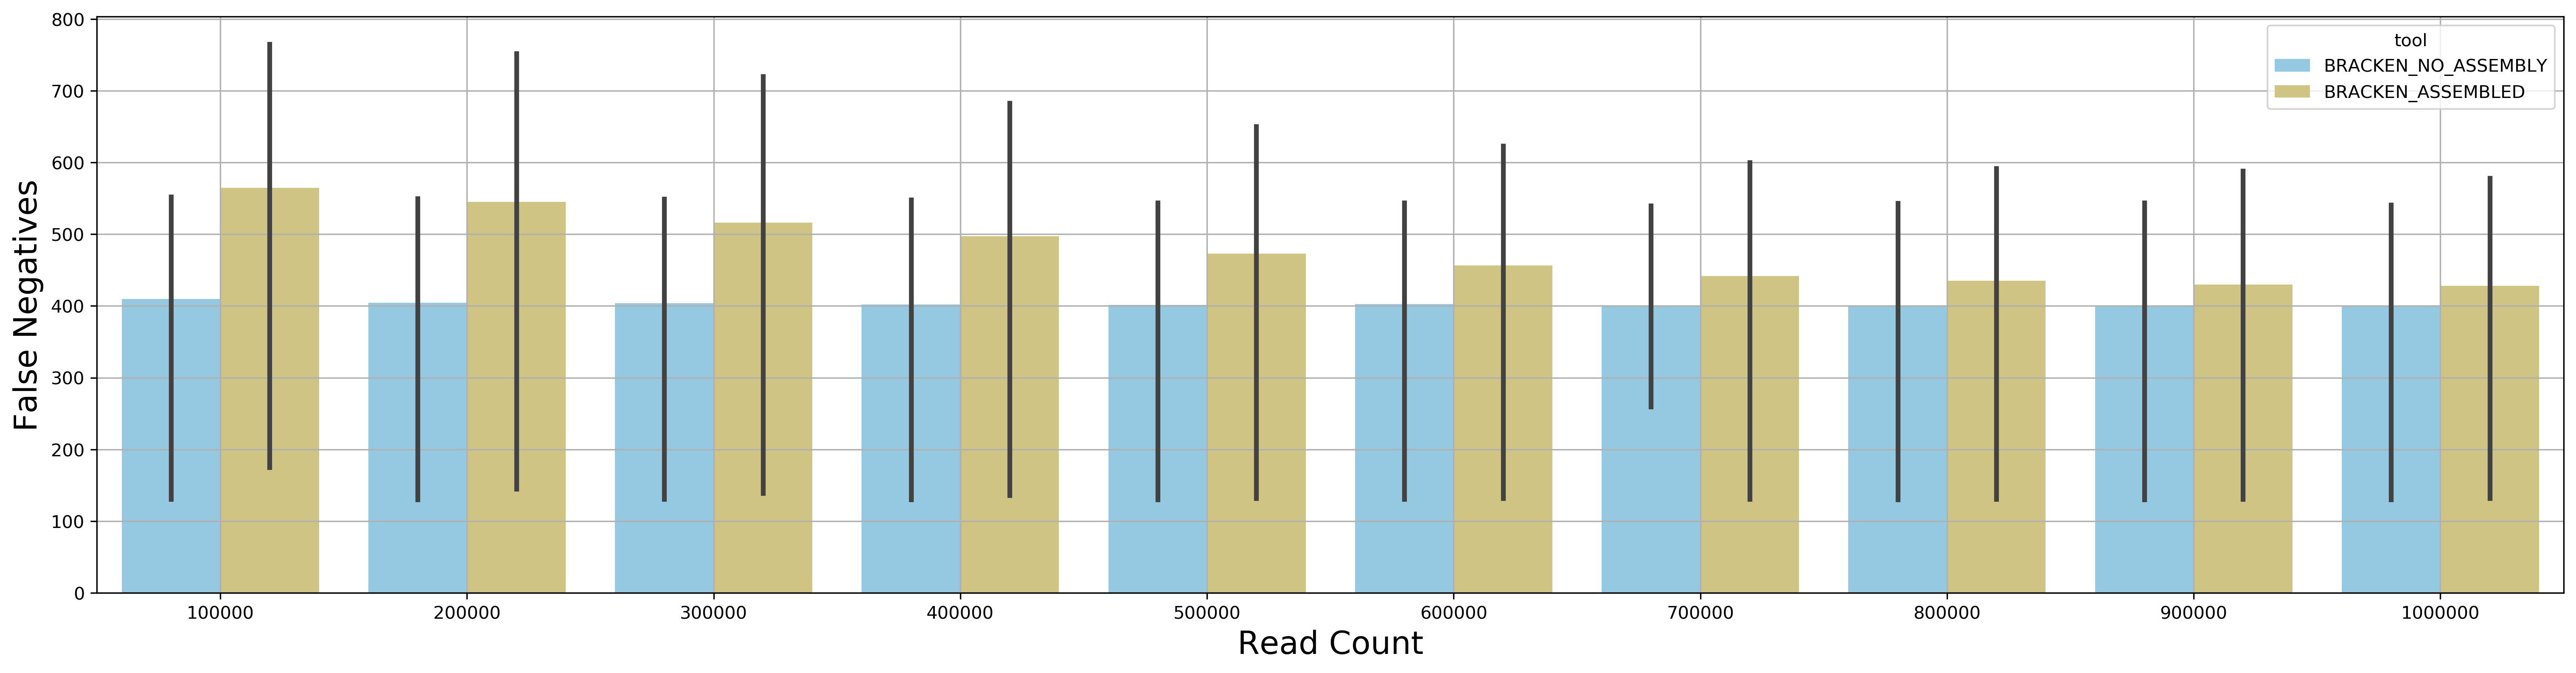

In [34]:
plt.figure(figsize=(25, 6), dpi=300)
reads800_bracken_df = results_df[results_df['experiment'] == 'num_reads_800genomes']


# choose EnrichSeq version and plot
sns.barplot(data=reads800_bracken_df, x="num_reads", y="false_neg", hue="tool", palette=colorblind_palette)
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('False Negatives', fontsize=18)
plt.grid()
plt.show()